In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer


%matplotlib inline
pd.set_option("display.max_columns", None)

In [2]:
# This dataset is derived after snetiment analysis
df = pd.read_csv("HotelReviewWithSentiment.csv")
df.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Sentiment
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,-1
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,NaN,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,1
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,1
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,1
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,1


In [3]:
# checking the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             387848 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             479792 non-null  object 
 

<AxesSubplot:>

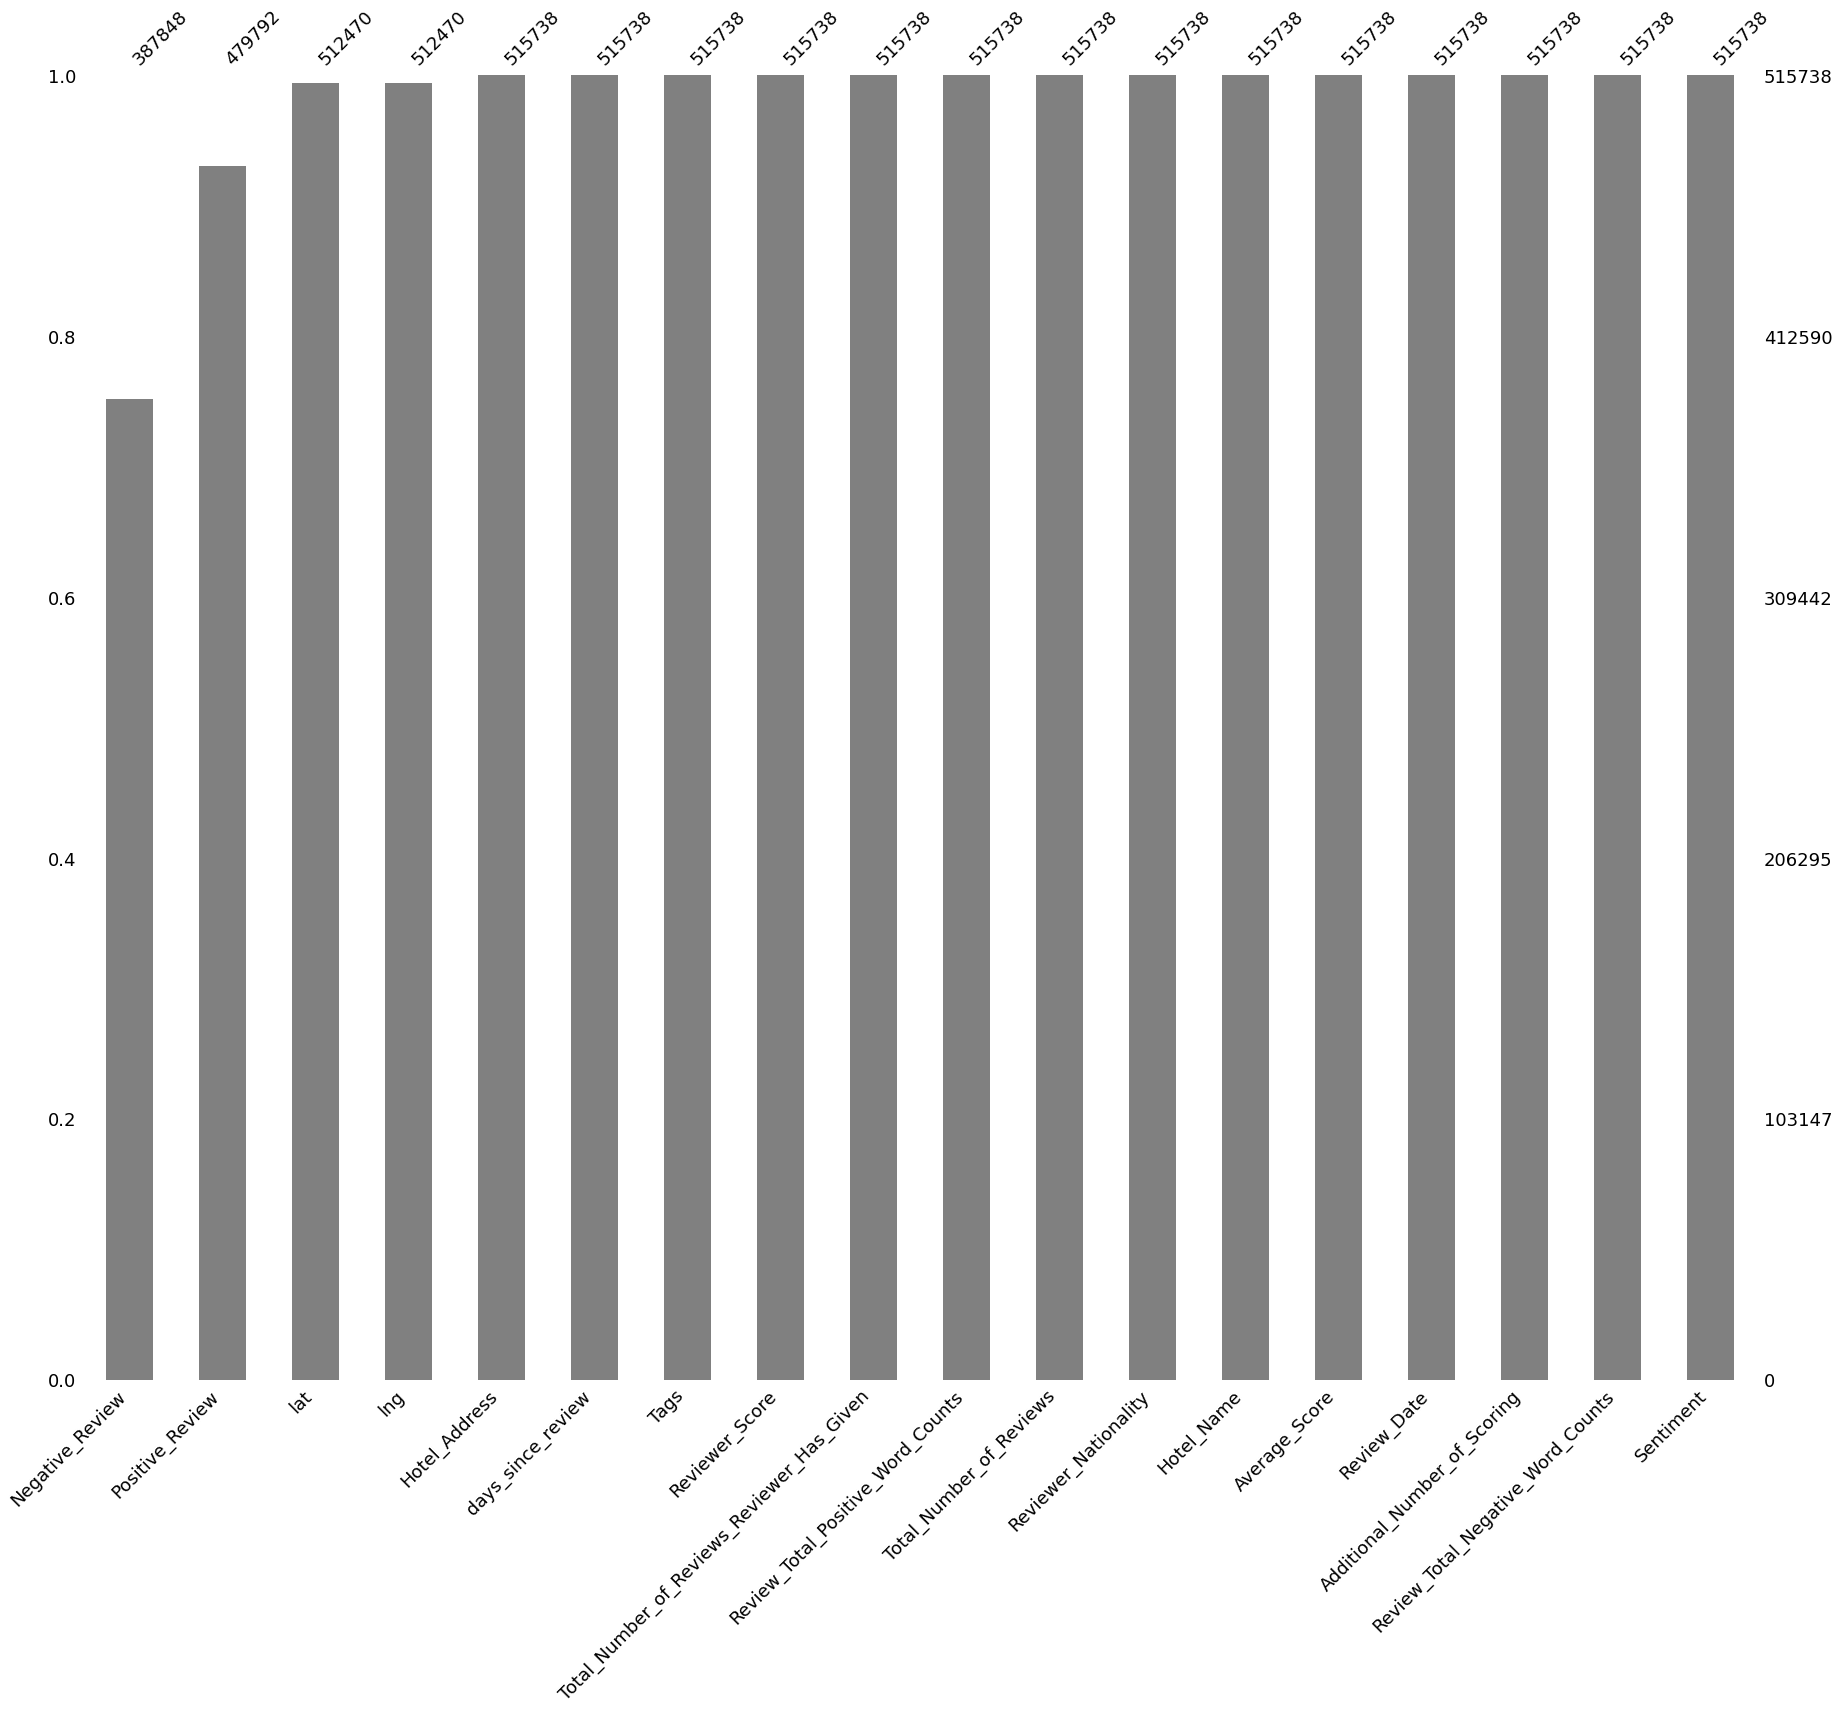

In [4]:
import missingno as msn
msn.bar(df, figsize=(30,24), sort='ascending', color="#808080", fontsize=18, labels=True)

In [5]:
# filling the missing values in positive review with an empty string
df.Positive_Review= df.Positive_Review.fillna(" ")
df.Positive_Review.isnull().sum()

0

In [6]:
# filling the missing values in negative review with an empty string
df.Negative_Review = df.Negative_Review.fillna(" ")
df.Negative_Review.isnull().sum()

0

In [7]:
# checking the null values present in the dataframe
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
Sentiment                                        0
dtype: int64

In [8]:
# It seems some latitude and longitude are missing the data so we will drop those rows.
df.dropna(axis=1, inplace=True)
df.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
Sentiment                                     0
dtype: int64

In [9]:
# removing the negtaive review and then lemmatizing the review into the list of clean sentences
negative_reviews = []
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

for review in df.Negative_Review:
    # filtering only alphanumeric words in review
    alpha_num_review = re.sub(r'[^a-zA-Z]', " ", review)
    # tokenizing the sentences into words
    words = word_tokenize(alpha_num_review)
    # converting the words into the lowercase
    words = [word.lower() for word in words]
    # removing stop words 
    words = [word for word in words if word not in stop_words]
    # lemmatizing the words 
    lemma = [lemmatizer.lemmatize(word) for word in words]
    # converting lemma into sentences.
    negative_reviews.append(" ".join(lemma))

In [10]:
negative_reviews[0]

'angry made post available via possible site use planing trip one make mistake booking place made booking via booking com stayed night hotel july upon arrival placed small room nd floor hotel turned room booked specially reserved level duplex room would big window high ceiling room ok mind broken window closed hello rain mini fridge contained sort bio weapon least guessed smell intimately asked change room explaining time booked duplex btw cost simple double got way volume due high ceiling offered room next day check next day clock order get room waned best way begin holiday wait till order check new room wonderful waist time room got wanted peaceful internal garden view big window tired waiting room placed belonging rushed city evening turned constant noise room guess made vibrating vent tube something constant annoying hell stop even making hard fall asleep wife audio recording attach want send via e mail next day technician came able determine cause disturbing sound offered change r

In [11]:
# Finding the most common words in negative reviews
cv = CountVectorizer(analyzer="word", stop_words="english", ngram_range=(3,3), max_features=100)
neg_words_dict = cv.fit_transform(negative_reviews)
most_common_neg_words = cv.vocabulary_
most_common_neg_words

{'booking booking com': 14,
 'tea coffee facility': 92,
 'water pressure shower': 97,
 'coffee facility room': 22,
 'ground floor room': 36,
 'booking com hotel': 15,
 'room small bathroom': 75,
 'building work going': 21,
 'good value money': 35,
 'breakfast included price': 18,
 'air conditioning working': 4,
 'booked twin room': 13,
 'room double bed': 58,
 'room size small': 74,
 'room little small': 64,
 'booked booking com': 11,
 'iron ironing board': 41,
 'room th floor': 82,
 'size room small': 85,
 'room extremely small': 59,
 'room bathroom small': 55,
 'room bit small': 56,
 'king size bed': 42,
 'room little bit': 63,
 'little bit small': 46,
 'hot air conditioning': 37,
 'room hot air': 62,
 'room really small': 68,
 'room quite small': 66,
 'double bed single': 26,
 'bed single bed': 8,
 'breakfast room small': 20,
 'room small people': 77,
 'air conditioning noisy': 0,
 'standard double room': 90,
 'coffee machine room': 23,
 'small room small': 88,
 'single bed pushed':

### Most common tri-gram word sequence as a complaints are 

In [12]:
# small room complaints tri-grams
small_room = [key for key in most_common_neg_words.keys() if ("small" in key and "room" in key)\
              or ("room" in key and "little" in key) or ("room" in key and "samller" in key)]
small_room

['room small bathroom',
 'room size small',
 'room little small',
 'size room small',
 'room extremely small',
 'room bathroom small',
 'room bit small',
 'room little bit',
 'room really small',
 'room quite small',
 'breakfast room small',
 'room small people',
 'small room small',
 'room smaller expected',
 'small room bathroom',
 'room far small',
 'double room small',
 'room small room',
 'room room small',
 'room small price',
 'room small bed',
 'single room small',
 'room little tired']

In [13]:
room_congested = np.zeros(len(df))
for i in range(len(df)):
    if "room small" in negative_reviews[i]:
        room_congested[i] = 1
    elif "room size small" in negative_reviews[i]:
        room_congested[i] = 1
    elif "room little" in negative_reviews[i]:
        room_congested[i] = 1
    elif "room extremely small" in negative_reviews[i]:
        room_congested[i] = 1
    elif "room bit small" in negative_reviews[i]:
        room_congested[i] = 1
    elif "room really small" in negative_reviews[i]:
        room_congested[i] = 1
    elif "room quite small" in negative_reviews[i]:
        room_congested[i] = 1
    elif "room smaller expected" in negative_reviews[i]:
        room_congested[i] = 1
    elif "room far small" in negative_reviews[i]:
        room_congested[i] = 1

np.sum(room_congested)

23675.0

In [14]:
df["small_room"] = room_congested

In [15]:
# expensive 
expensive_trigrams = [key for key in most_common_neg_words.keys() if "expensive" in key]
expensive_trigrams

['breakfast bit expensive', 'little bit expensive']

In [16]:
# costly hotel and its services
expensive = np.zeros(len(df))
for i in range(len(df)):
    if 'breakfast bit expensive' in negative_reviews[i]:
        expensive[i] = 1
    elif 'little bit expensive' in negative_reviews[i]:
        expensive[i] = 1
np.sum(expensive)

336.0

In [17]:
df["expensive"] = expensive

In [18]:
# location far
location_trigrams = [key for key in most_common_neg_words.keys() if "far" in key]
location_trigrams

['location bit far',
 'room far small',
 'little bit far',
 'far city centre',
 'far city center',
 'bit far city',
 'bit far away',
 'far away city']

In [19]:
# Hotel location Far
away_city = np.zeros(len(df))
for i in range(len(df)):
    if 'location bit far' in negative_reviews[i]:
        away_city[i] = 1
    elif 'little bit far' in negative_reviews[i]:
        away_city[i] = 1
    elif 'far city centre' in negative_reviews[i]:
        away_city[i] = 1
    elif 'far city center' in negative_reviews[i]:
        away_city[i] = 1
    elif 'bit far city' in negative_reviews[i]:
        away_city[i] = 1
    elif 'bit far away' in negative_reviews[i]:
        away_city[i] = 1
    elif 'far away city' in negative_reviews[i]:
        away_city[i] = 1
np.sum(away_city)

1472.0

In [20]:
df["Location_Remote"] = away_city

In [21]:
# hot room and air condition issue
hot_room_trigrams = [key for key in most_common_neg_words.keys() if 'hot' in key and 'air' in key]
hot_room_trigrams

['hot air conditioning', 'room hot air']

In [22]:
# Hot room or air condition not working 
hot_room = np.zeros(len(df))
for i in range(len(df)):
    if 'hot air conditioning' in negative_reviews[i]:
        hot_room[i] = 1
    elif 'room hot air' in negative_reviews[i]:
        hot_room[i] = 1
np.sum(hot_room)

283.0

In [23]:
df["AC_Problem"] = hot_room

In [24]:
# removing the stop words from postive review and then lemmatizing the review into the list of clean sentences
positive_reviews = []
for review in df.Positive_Review:
    # filtering the review
    alpha_num_review = re.sub(r'[^a-zA-Z]', " ", review)
    # tokenizing the review
    words = word_tokenize(alpha_num_review)
    # lowercasing the words 
    words = [word.lower() for word in words]
    # removing the stopwords 
    words = [word for word in words if word not in stop_words]
    # lemmatizing the words
    lemma = [lemmatizer.lemmatize(word) for word in words]
    # joing the lemmas as sentence and appending to list
    positive_reviews.append(" ".join(lemma))

In [25]:
positive_reviews[0]

'park outside hotel beautiful'

In [26]:
# Finding the most common words in negative reviews
cv = CountVectorizer(analyzer="word", stop_words="english", ngram_range=(3,3), max_features=100)
pos_words_dict = cv.fit_transform(positive_reviews)
most_common_pos_words = cv.vocabulary_
most_common_pos_words

{'location good staff': 62,
 'great location nice': 45,
 'minute walk away': 70,
 'staff friendly helpful': 87,
 'bed really comfortable': 4,
 'hotel friendly staff': 53,
 'friendly helpful staff': 25,
 'staff super friendly': 99,
 'staff helpful friendly': 93,
 'bed comfortable room': 0,
 'room spacious clean': 81,
 'room comfy bed': 75,
 'room friendly staff': 76,
 'really friendly helpful': 71,
 'staff extremely friendly': 85,
 'friendly staff great': 29,
 'staff great breakfast': 91,
 'room comfortable bed': 73,
 'room comfortable clean': 74,
 'good location good': 33,
 'great value money': 47,
 'friendly helpful room': 24,
 'bed really comfy': 5,
 'breakfast good location': 8,
 'helpful friendly staff': 48,
 'hotel good location': 54,
 'good location nice': 35,
 'staff really friendly': 97,
 'good size room': 36,
 'room good size': 79,
 'bed super comfy': 6,
 'friendly staff good': 28,
 'helpful room clean': 49,
 'good value money': 38,
 'hotel great location': 55,
 'great locatio

### Most common relevant positive compliments.

In [27]:
# Great location : great location, good location, excellent location, location great, location good, location excellent
locations = np.zeros(len(df))
for i in range(len(df)):
    if "great location" in positive_reviews[i]:
        locations[i]=1
    elif "good location" in positive_reviews[i]:
        locations[i]=1
    elif "excellent location" in positive_reviews[i]:
        locations[i]=1
    elif "location great" in positive_reviews[i]:
        locations[i]=1
    elif "location good" in positive_reviews[i]:
        locations[i]=1
    elif "location excellent" in positive_reviews[i]:
        locations[i]=1
np.sum(locations)

85132.0

In [28]:
df["Great_Location"]=locations

In [29]:
# Proximity: minute walk away, close metro station, close train station, easy walking distance
# location walking distance, close tube station, location minute walk
accessbility = np.zeros(len(df))
for i in range(len(df)):
    if "minute walk away" in positive_reviews[i]:
        accessbility[i]=1
    elif "close metro station" in positive_reviews[i]:
        accessbility[i]=1
    elif "close train station" in positive_reviews[i]:
        accessbility[i]=1
    elif "easy walking distance" in positive_reviews[i]:
        accessbility[i]=1
    elif "location walking distance" in positive_reviews[i]:
        accessbility[i]=1
    elif "close tube station" in positive_reviews[i]:
        accessbility[i]=1
    elif "location minute walk" in positive_reviews[i]:
        accessbility[i]=1
np.sum(accessbility)

5519.0

In [30]:
df["Accessbility"] = accessbility

In [31]:
# Friendly or Good staff: good staff, staff friendly helpful, friendly staff, friendly helpful staff, 
# staff super friendly, staff helpful friendly, staff extremely friendly, helpful friendly staff, staff really friendly
# staff nice helpful, staff really helpful, staff extremely helpful

staff_nature = np.zeros(len(df))
for i in range(len(df)):
    if "good staff" in positive_reviews[i]:
        staff_nature[i]=1
    elif ("staff friendly" in positive_reviews[i]) or ("friendly staff" in positive_reviews[i]):
        staff_nature[i]=1
    elif ("helpful staff" in positive_reviews[i]) or ("staff helpful" in positive_reviews[i]):
        staff_nature[i]=1
    elif ("staff super friendly" in positive_reviews[i]) or ("staff extremely friendly" in positive_reviews[i]):
        staff_nature[i]=1
    elif ("staff really friendly" in positive_reviews[i]) or ("staff nice helpful" in positive_reviews[i]):
        staff_nature[i] =1
    elif ("staff really helpful" in positive_reviews[i] or "staff extremely helpful" in positive_reviews[i]):
        staff_nature[i]=1
np.sum(staff_nature)

92384.0

In [32]:
df["Friendly_Staff"] = staff_nature

In [33]:
most_common_pos_words.keys()

dict_keys(['location good staff', 'great location nice', 'minute walk away', 'staff friendly helpful', 'bed really comfortable', 'hotel friendly staff', 'friendly helpful staff', 'staff super friendly', 'staff helpful friendly', 'bed comfortable room', 'room spacious clean', 'room comfy bed', 'room friendly staff', 'really friendly helpful', 'staff extremely friendly', 'friendly staff great', 'staff great breakfast', 'room comfortable bed', 'room comfortable clean', 'good location good', 'great value money', 'friendly helpful room', 'bed really comfy', 'breakfast good location', 'helpful friendly staff', 'hotel good location', 'good location nice', 'staff really friendly', 'good size room', 'room good size', 'bed super comfy', 'friendly staff good', 'helpful room clean', 'good value money', 'hotel great location', 'great location good', 'room clean comfortable', 'staff nice helpful', 'staff good location', 'friendly staff nice', 'staff really helpful', 'staff great location', 'staff ex

In [34]:
# room and bed comfortable: bed really comfortable, bed comfortable room, room spacious clean, room comfy bed
# room comfortable, bed really comfy, bed super comfy, bed comfortable, clean bed comfortable, bed extremely comfortable
# bed comfy room, comfy bed great, clean room good
room_and_bed = np.zeros(len(df))
for i in range(len(df)):
    if ("bed really comfortable" in positive_reviews[i]) or ("bed comfortable" in positive_reviews[i]):
        room_and_bed[i]=1
    elif ("room spacious clean" in positive_reviews[i]) or ("room comfy bed" in positive_reviews[i]):
        room_and_bed[i]=1
    elif ("room comfortable" in positive_reviews[i]) or ("bed really comfy" in positive_reviews[i]):
        room_and_bed[i]=1
    elif ("bed super comfy" in positive_reviews[i]) or ("bed extremely comfortable" in positive_reviews[i]):
        room_and_bed[i]=1
    elif ("bed comfy room" in positive_reviews[i]) or ("comfy bed great" in positive_reviews[i]):
        room_and_bed[i]=1
np.sum(room_and_bed)

22963.0

In [35]:
df["Comfortable"]= room_and_bed

In [36]:
# monetary value: great value money, excellent value money
monetary_value = np.zeros(len(df))
for i in range(len(df)):
    if ("great value money" in positive_reviews[i]) or ("excellent value money" in positive_reviews[i]):
        monetary_value[i]=1
np.sum(monetary_value)

2011.0

In [37]:
df["Monteray_Value"] = monetary_value

In [38]:
# good breakfast: good breakfast
breakfast_good = np.zeros(len(df))
for i in range(len(df)):
    if ("good breakfast" in positive_reviews[i]) or ("breakfast good" in positive_reviews[i]):
        breakfast_good[i]=1
np.sum(breakfast_good)

17604.0

In [39]:
df["Good_Breakfast"]=breakfast_good

In [40]:
df.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Sentiment,small_room,expensive,Location_Remote,AC_Problem,Great_Location,Accessbility,Friendly_Staff,Comfortable,Monteray_Value,Good_Breakfast
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


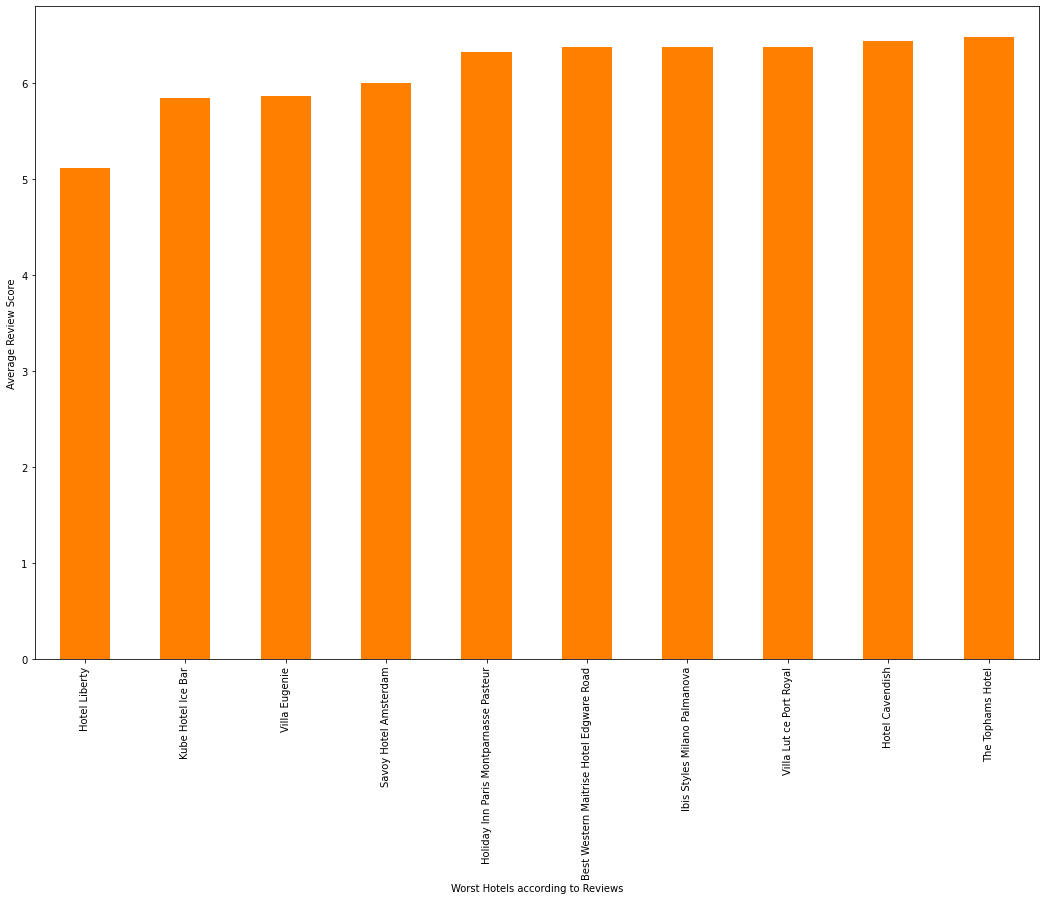

In [41]:
# Top 10 worst hotels by Reviewer Score
worst_hotel = df.groupby("Hotel_Name")["Reviewer_Score"].mean().sort_values(ascending=True).head(10)
plt.figure(figsize=(18,12))
worst_hotel.plot(kind='bar', color="#FF8000")
plt.xlabel('Worst Hotels according to Reviews')
plt.ylabel('Average Review Score')
plt.show()

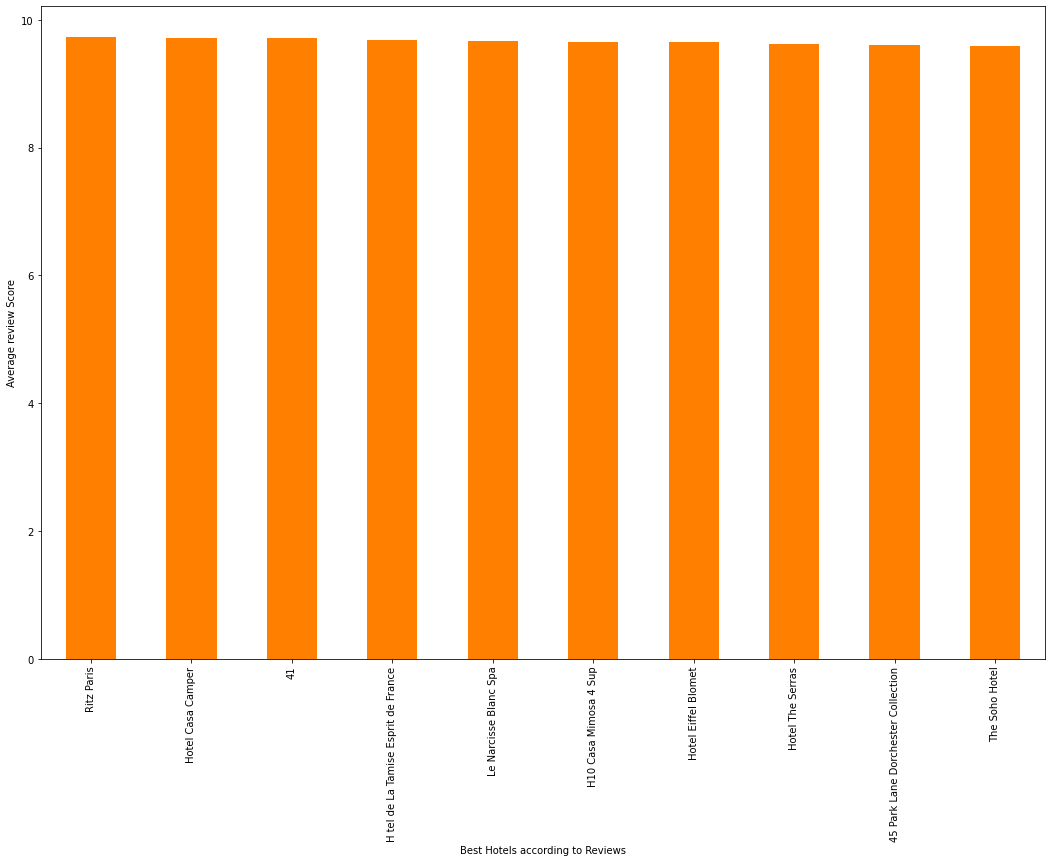

In [42]:
# Top 10 best hotel by Reviewer Score
best_hotel = df.groupby("Hotel_Name")["Reviewer_Score"].mean().\
                sort_values(ascending=False).head(10)
plt.figure(figsize=(18,12))
best_hotel.plot(kind='bar', color='#FF8000')
plt.xlabel('Best Hotels according to Reviews')
plt.ylabel('Average review Score')
plt.show()

In [43]:
# countries details
# link of the file https://gist.githubusercontent.com/Desperado/3293395/raw/f5f9db4f1b287804fd07ffb3296ed0036292bc7a/countryinfo.py
countries = [
{'timezones': ['Europe/Andorra'], 'code': 'AD', 'continent': 'Europe', 'name': 'Andorra', 'capital': 'Andorra la Vella'},
{'timezones': ['Asia/Kabul'], 'code': 'AF', 'continent': 'Asia', 'name': 'Afghanistan', 'capital': 'Kabul'},
{'timezones': ['America/Antigua'], 'code': 'AG', 'continent': 'North America', 'name': 'Antigua and Barbuda', 'capital': "St. John's"},
{'timezones': ['Europe/Tirane'], 'code': 'AL', 'continent': 'Europe', 'name': 'Albania', 'capital': 'Tirana'},
{'timezones': ['Asia/Yerevan'], 'code': 'AM', 'continent': 'Asia', 'name': 'Armenia', 'capital': 'Yerevan'},
{'timezones': ['Africa/Luanda'], 'code': 'AO', 'continent': 'Africa', 'name': 'Angola', 'capital': 'Luanda'},
{'timezones': ['America/Argentina/Buenos_Aires', 'America/Argentina/Cordoba', 'America/Argentina/Jujuy', 'America/Argentina/Tucuman', 'America/Argentina/Catamarca', 'America/Argentina/La_Rioja', 'America/Argentina/San_Juan', 'America/Argentina/Mendoza', 'America/Argentina/Rio_Gallegos', 'America/Argentina/Ushuaia'], 'code': 'AR', 'continent': 'South America', 'name': 'Argentina', 'capital': 'Buenos Aires'},
{'timezones': ['Europe/Vienna'], 'code': 'AT', 'continent': 'Europe', 'name': 'Austria', 'capital': 'Vienna'},
{'timezones': ['Australia/Lord_Howe', 'Australia/Hobart', 'Australia/Currie', 'Australia/Melbourne', 'Australia/Sydney', 'Australia/Broken_Hill', 'Australia/Brisbane', 'Australia/Lindeman', 'Australia/Adelaide', 'Australia/Darwin', 'Australia/Perth'], 'code': 'AU', 'continent': 'Oceania', 'name': 'Australia', 'capital': 'Canberra'},
{'timezones': ['Asia/Baku'], 'code': 'AZ', 'continent': 'Asia', 'name': 'Azerbaijan', 'capital': 'Baku'},
{'timezones': ['America/Barbados'], 'code': 'BB', 'continent': 'North America', 'name': 'Barbados', 'capital': 'Bridgetown'},
{'timezones': ['Asia/Dhaka'], 'code': 'BD', 'continent': 'Asia', 'name': 'Bangladesh', 'capital': 'Dhaka'},
{'timezones': ['Europe/Brussels'], 'code': 'BE', 'continent': 'Europe', 'name': 'Belgium', 'capital': 'Brussels'},
{'timezones': ['Africa/Ouagadougou'], 'code': 'BF', 'continent': 'Africa', 'name': 'Burkina Faso', 'capital': 'Ouagadougou'},
{'timezones': ['Europe/Sofia'], 'code': 'BG', 'continent': 'Europe', 'name': 'Bulgaria', 'capital': 'Sofia'},
{'timezones': ['Asia/Bahrain'], 'code': 'BH', 'continent': 'Asia', 'name': 'Bahrain', 'capital': 'Manama'},
{'timezones': ['Africa/Bujumbura'], 'code': 'BI', 'continent': 'Africa', 'name': 'Burundi', 'capital': 'Bujumbura'},
{'timezones': ['Africa/Porto-Novo'], 'code': 'BJ', 'continent': 'Africa', 'name': 'Benin', 'capital': 'Porto-Novo'},
{'timezones': ['Asia/Brunei'], 'code': 'BN', 'continent': 'Asia', 'name': 'Brunei Darussalam', 'capital': 'Bandar Seri Begawan'},
{'timezones': ['America/La_Paz'], 'code': 'BO', 'continent': 'South America', 'name': 'Bolivia', 'capital': 'Sucre'},
{'timezones': ['America/Noronha', 'America/Belem', 'America/Fortaleza', 'America/Recife', 'America/Araguaina', 'America/Maceio', 'America/Bahia', 'America/Sao_Paulo', 'America/Campo_Grande', 'America/Cuiaba', 'America/Porto_Velho', 'America/Boa_Vista', 'America/Manaus', 'America/Eirunepe', 'America/Rio_Branco'], 'code': 'BR', 'continent': 'South America', 'name': 'Brazil', 'capital': 'Bras\xc3\xadlia'},
{'timezones': ['America/Nassau'], 'code': 'BS', 'continent': 'North America', 'name': 'Bahamas', 'capital': 'Nassau'},
{'timezones': ['Asia/Thimphu'], 'code': 'BT', 'continent': 'Asia', 'name': 'Bhutan', 'capital': 'Thimphu'},
{'timezones': ['Africa/Gaborone'], 'code': 'BW', 'continent': 'Africa', 'name': 'Botswana', 'capital': 'Gaborone'},
{'timezones': ['Europe/Minsk'], 'code': 'BY', 'continent': 'Europe', 'name': 'Belarus', 'capital': 'Minsk'},
{'timezones': ['America/Belize'], 'code': 'BZ', 'continent': 'North America', 'name': 'Belize', 'capital': 'Belmopan'},
{'timezones': ['America/St_Johns', 'America/Halifax', 'America/Glace_Bay', 'America/Moncton', 'America/Goose_Bay', 'America/Blanc-Sablon', 'America/Montreal', 'America/Toronto', 'America/Nipigon', 'America/Thunder_Bay', 'America/Pangnirtung', 'America/Iqaluit', 'America/Atikokan', 'America/Rankin_Inlet', 'America/Winnipeg', 'America/Rainy_River', 'America/Cambridge_Bay', 'America/Regina', 'America/Swift_Current', 'America/Edmonton', 'America/Yellowknife', 'America/Inuvik', 'America/Dawson_Creek', 'America/Vancouver', 'America/Whitehorse', 'America/Dawson'], 'code': 'CA', 'continent': 'North America', 'name': 'Canada', 'capital': 'Ottawa'},
{'timezones': ['Africa/Kinshasa', 'Africa/Lubumbashi'], 'code': 'CD', 'continent': 'Africa', 'name': 'Democratic Republic of the Congo', 'capital': 'Kinshasa'},
{'timezones': ['Africa/Brazzaville'], 'code': 'CG', 'continent': 'Africa', 'name': 'Republic of the Congo', 'capital': 'Brazzaville'},
{'timezones': ['Africa/Abidjan'], 'code': 'CI', 'continent': 'Africa', 'name': "C\xc3\xb4te d'Ivoire", 'capital': 'Yamoussoukro'},
{'timezones': ['America/Santiago', 'Pacific/Easter'], 'code': 'CL', 'continent': 'South America', 'name': 'Chile', 'capital': 'Santiago'},
{'timezones': ['Africa/Douala'], 'code': 'CM', 'continent': 'Africa', 'name': 'Cameroon', 'capital': 'Yaound\xc3\xa9'},
{'timezones': ['Asia/Shanghai', 'Asia/Harbin', 'Asia/Chongqing', 'Asia/Urumqi', 'Asia/Kashgar'], 'code': 'CN', 'continent': 'Asia', 'name': "People's Republic of China", 'capital': 'Beijing'},
{'timezones': ['America/Bogota'], 'code': 'CO', 'continent': 'South America', 'name': 'Colombia', 'capital': 'Bogot\xc3\xa1'},
{'timezones': ['America/Costa_Rica'], 'code': 'CR', 'continent': 'North America', 'name': 'Costa Rica', 'capital': 'San Jos\xc3\xa9'},
{'timezones': ['America/Havana'], 'code': 'CU', 'continent': 'North America', 'name': 'Cuba', 'capital': 'Havana'},
{'timezones': ['Atlantic/Cape_Verde'], 'code': 'CV', 'continent': 'Africa', 'name': 'Cape Verde', 'capital': 'Praia'},
{'timezones': ['Asia/Nicosia'], 'code': 'CY', 'continent': 'Asia', 'name': 'Cyprus', 'capital': 'Nicosia'},
{'timezones': ['Europe/Prague'], 'code': 'CZ', 'continent': 'Europe', 'name': 'Czech Republic', 'capital': 'Prague'},
{'timezones': ['Europe/Berlin'], 'code': 'DE', 'continent': 'Europe', 'name': 'Germany', 'capital': 'Berlin'},
{'timezones': ['Africa/Djibouti'], 'code': 'DJ', 'continent': 'Africa', 'name': 'Djibouti', 'capital': 'Djibouti City'},
{'timezones': ['Europe/Copenhagen'], 'code': 'DK', 'continent': 'Europe', 'name': 'Denmark', 'capital': 'Copenhagen'},
{'timezones': ['America/Dominica'], 'code': 'DM', 'continent': 'North America', 'name': 'Dominica', 'capital': 'Roseau'},
{'timezones': ['America/Santo_Domingo'], 'code': 'DO', 'continent': 'North America', 'name': 'Dominican Republic', 'capital': 'Santo Domingo'},
{'timezones': ['America/Guayaquil', 'Pacific/Galapagos'], 'code': 'EC', 'continent': 'South America', 'name': 'Ecuador', 'capital': 'Quito'},
{'timezones': ['Europe/Tallinn'], 'code': 'EE', 'continent': 'Europe', 'name': 'Estonia', 'capital': 'Tallinn'},
{'timezones': ['Africa/Cairo'], 'code': 'EG', 'continent': 'Africa', 'name': 'Egypt', 'capital': 'Cairo'},
{'timezones': ['Africa/Asmera'], 'code': 'ER', 'continent': 'Africa', 'name': 'Eritrea', 'capital': 'Asmara'},
{'timezones': ['Africa/Addis_Ababa'], 'code': 'ET', 'continent': 'Africa', 'name': 'Ethiopia', 'capital': 'Addis Ababa'},
{'timezones': ['Europe/Helsinki'], 'code': 'FI', 'continent': 'Europe', 'name': 'Finland', 'capital': 'Helsinki'},
{'timezones': ['Pacific/Fiji'], 'code': 'FJ', 'continent': 'Oceania', 'name': 'Fiji', 'capital': 'Suva'},
{'timezones': ['Europe/Paris'], 'code': 'FR', 'continent': 'Europe', 'name': 'France', 'capital': 'Paris'},
{'timezones': ['Africa/Libreville'], 'code': 'GA', 'continent': 'Africa', 'name': 'Gabon', 'capital': 'Libreville'},
{'timezones': ['Asia/Tbilisi'], 'code': 'GE', 'continent': 'Asia', 'name': 'Georgia', 'capital': 'Tbilisi'},
{'timezones': ['Africa/Accra'], 'code': 'GH', 'continent': 'Africa', 'name': 'Ghana', 'capital': 'Accra'},
{'timezones': ['Africa/Banjul'], 'code': 'GM', 'continent': 'Africa', 'name': 'The Gambia', 'capital': 'Banjul'},
{'timezones': ['Africa/Conakry'], 'code': 'GN', 'continent': 'Africa', 'name': 'Guinea', 'capital': 'Conakry'},
{'timezones': ['Europe/Athens'], 'code': 'GR', 'continent': 'Europe', 'name': 'Greece', 'capital': 'Athens'},
{'timezones': ['America/Guatemala'], 'code': 'GT', 'continent': 'North America', 'name': 'Guatemala', 'capital': 'Guatemala City'},
{'timezones': ['America/Guatemala'], 'code': 'GT', 'continent': 'North America', 'name': 'Haiti', 'capital': 'Port-au-Prince'},
{'timezones': ['Africa/Bissau'], 'code': 'GW', 'continent': 'Africa', 'name': 'Guinea-Bissau', 'capital': 'Bissau'},
{'timezones': ['America/Guyana'], 'code': 'GY', 'continent': 'South America', 'name': 'Guyana', 'capital': 'Georgetown'},
{'timezones': ['America/Tegucigalpa'], 'code': 'HN', 'continent': 'North America', 'name': 'Honduras', 'capital': 'Tegucigalpa'},
{'timezones': ['Europe/Budapest'], 'code': 'HU', 'continent': 'Europe', 'name': 'Hungary', 'capital': 'Budapest'},
{'timezones': ['Asia/Jakarta', 'Asia/Pontianak', 'Asia/Makassar', 'Asia/Jayapura'], 'code': 'ID', 'continent': 'Asia', 'name': 'Indonesia', 'capital': 'Jakarta'},
{'timezones': ['Europe/Dublin'], 'code': 'IE', 'continent': 'Europe', 'name': 'Republic of Ireland', 'capital': 'Dublin'},
{'timezones': ['Asia/Jerusalem'], 'code': 'IL', 'continent': 'Asia', 'name': 'Israel', 'capital': 'Jerusalem'},
{'timezones': ['Asia/Calcutta'], 'code': 'IN', 'continent': 'Asia', 'name': 'India', 'capital': 'New Delhi'},
{'timezones': ['Asia/Baghdad'], 'code': 'IQ', 'continent': 'Asia', 'name': 'Iraq', 'capital': 'Baghdad'},
{'timezones': ['Asia/Tehran'], 'code': 'IR', 'continent': 'Asia', 'name': 'Iran', 'capital': 'Tehran'},
{'timezones': ['Atlantic/Reykjavik'], 'code': 'IS', 'continent': 'Europe', 'name': 'Iceland', 'capital': 'Reykjav\xc3\xadk'},
{'timezones': ['Europe/Rome'], 'code': 'IT', 'continent': 'Europe', 'name': 'Italy', 'capital': 'Rome'},
{'timezones': ['America/Jamaica'], 'code': 'JM', 'continent': 'North America', 'name': 'Jamaica', 'capital': 'Kingston'},
{'timezones': ['Asia/Amman'], 'code': 'JO', 'continent': 'Asia', 'name': 'Jordan', 'capital': 'Amman'},
{'timezones': ['Asia/Tokyo'], 'code': 'JP', 'continent': 'Asia', 'name': 'Japan', 'capital': 'Tokyo'},
{'timezones': ['Africa/Nairobi'], 'code': 'KE', 'continent': 'Africa', 'name': 'Kenya', 'capital': 'Nairobi'},
{'timezones': ['Asia/Bishkek'], 'code': 'KG', 'continent': 'Asia', 'name': 'Kyrgyzstan', 'capital': 'Bishkek'},
{'timezones': ['Pacific/Tarawa', 'Pacific/Enderbury', 'Pacific/Kiritimati'], 'code': 'KI', 'continent': 'Oceania', 'name': 'Kiribati', 'capital': 'Tarawa'},
{'timezones': ['Asia/Pyongyang'], 'code': 'KP', 'continent': 'Asia', 'name': 'North Korea', 'capital': 'Pyongyang'},
{'timezones': ['Asia/Seoul'], 'code': 'KR', 'continent': 'Asia', 'name': 'South Korea', 'capital': 'Seoul'},
{'timezones': ['Asia/Kuwait'], 'code': 'KW', 'continent': 'Asia', 'name': 'Kuwait', 'capital': 'Kuwait City'},
{'timezones': ['Asia/Beirut'], 'code': 'LB', 'continent': 'Asia', 'name': 'Lebanon', 'capital': 'Beirut'},
{'timezones': ['Europe/Vaduz'], 'code': 'LI', 'continent': 'Europe', 'name': 'Liechtenstein', 'capital': 'Vaduz'},
{'timezones': ['Africa/Monrovia'], 'code': 'LR', 'continent': 'Africa', 'name': 'Liberia', 'capital': 'Monrovia'},
{'timezones': ['Africa/Maseru'], 'code': 'LS', 'continent': 'Africa', 'name': 'Lesotho', 'capital': 'Maseru'},
{'timezones': ['Europe/Vilnius'], 'code': 'LT', 'continent': 'Europe', 'name': 'Lithuania', 'capital': 'Vilnius'},
{'timezones': ['Europe/Luxembourg'], 'code': 'LU', 'continent': 'Europe', 'name': 'Luxembourg', 'capital': 'Luxembourg City'},
{'timezones': ['Europe/Riga'], 'code': 'LV', 'continent': 'Europe', 'name': 'Latvia', 'capital': 'Riga'},
{'timezones': ['Africa/Tripoli'], 'code': 'LY', 'continent': 'Africa', 'name': 'Libya', 'capital': 'Tripoli'},
{'timezones': ['Indian/Antananarivo'], 'code': 'MG', 'continent': 'Africa', 'name': 'Madagascar', 'capital': 'Antananarivo'},
{'timezones': ['Pacific/Majuro', 'Pacific/Kwajalein'], 'code': 'MH', 'continent': 'Oceania', 'name': 'Marshall Islands', 'capital': 'Majuro'},
{'timezones': ['Europe/Skopje'], 'code': 'MK', 'continent': 'Europe', 'name': 'Macedonia', 'capital': 'Skopje'},
{'timezones': ['Africa/Bamako'], 'code': 'ML', 'continent': 'Africa', 'name': 'Mali', 'capital': 'Bamako'},
{'timezones': ['Asia/Rangoon'], 'code': 'MM', 'continent': 'Asia', 'name': 'Myanmar', 'capital': 'Naypyidaw'},
{'timezones': ['Asia/Ulaanbaatar', 'Asia/Hovd', 'Asia/Choibalsan'], 'code': 'MN', 'continent': 'Asia', 'name': 'Mongolia', 'capital': 'Ulaanbaatar'},
{'timezones': ['Africa/Nouakchott'], 'code': 'MR', 'continent': 'Africa', 'name': 'Mauritania', 'capital': 'Nouakchott'},
{'timezones': ['Europe/Malta'], 'code': 'MT', 'continent': 'Europe', 'name': 'Malta', 'capital': 'Valletta'},
{'timezones': ['Indian/Mauritius'], 'code': 'MU', 'continent': 'Africa', 'name': 'Mauritius', 'capital': 'Port Louis'},
{'timezones': ['Indian/Maldives'], 'code': 'MV', 'continent': 'Asia', 'name': 'Maldives', 'capital': 'Mal\xc3\xa9'},
{'timezones': ['Africa/Blantyre'], 'code': 'MW', 'continent': 'Africa', 'name': 'Malawi', 'capital': 'Lilongwe'},
{'timezones': ['America/Mexico_City', 'America/Cancun', 'America/Merida', 'America/Monterrey', 'America/Mazatlan', 'America/Chihuahua', 'America/Hermosillo', 'America/Tijuana'], 'code': 'MX', 'continent': 'North America', 'name': 'Mexico', 'capital': 'Mexico City'},
{'timezones': ['Asia/Kuala_Lumpur', 'Asia/Kuching'], 'code': 'MY', 'continent': 'Asia', 'name': 'Malaysia', 'capital': 'Kuala Lumpur'},
{'timezones': ['Africa/Maputo'], 'code': 'MZ', 'continent': 'Africa', 'name': 'Mozambique', 'capital': 'Maputo'},
{'timezones': ['Africa/Windhoek'], 'code': 'NA', 'continent': 'Africa', 'name': 'Namibia', 'capital': 'Windhoek'},
{'timezones': ['Africa/Niamey'], 'code': 'NE', 'continent': 'Africa', 'name': 'Niger', 'capital': 'Niamey'},
{'timezones': ['Africa/Lagos'], 'code': 'NG', 'continent': 'Africa', 'name': 'Nigeria', 'capital': 'Abuja'},
{'timezones': ['America/Managua'], 'code': 'NI', 'continent': 'North America', 'name': 'Nicaragua', 'capital': 'Managua'},
{'timezones': ['Europe/Amsterdam'], 'code': 'NL', 'continent': 'Europe', 'name': 'Kingdom of the Netherlands', 'capital': 'Amsterdam'},
{'timezones': ['Europe/Oslo'], 'code': 'NO', 'continent': 'Europe', 'name': 'Norway', 'capital': 'Oslo'},
{'timezones': ['Asia/Katmandu'], 'code': 'NP', 'continent': 'Asia', 'name': 'Nepal', 'capital': 'Kathmandu'},
{'timezones': ['Pacific/Nauru'], 'code': 'NR', 'continent': 'Oceania', 'name': 'Nauru', 'capital': 'Yaren'},
{'timezones': ['Pacific/Auckland', 'Pacific/Chatham'], 'code': 'NZ', 'continent': 'Oceania', 'name': 'New Zealand', 'capital': 'Wellington'},
{'timezones': ['Asia/Muscat'], 'code': 'OM', 'continent': 'Asia', 'name': 'Oman', 'capital': 'Muscat'},
{'timezones': ['America/Panama'], 'code': 'PA', 'continent': 'North America', 'name': 'Panama', 'capital': 'Panama City'},
{'timezones': ['America/Lima'], 'code': 'PE', 'continent': 'South America', 'name': 'Peru', 'capital': 'Lima'},
{'timezones': ['Pacific/Port_Moresby'], 'code': 'PG', 'continent': 'Oceania', 'name': 'Papua New Guinea', 'capital': 'Port Moresby'},
{'timezones': ['Asia/Manila'], 'code': 'PH', 'continent': 'Asia', 'name': 'Philippines', 'capital': 'Manila'},
{'timezones': ['Asia/Karachi'], 'code': 'PK', 'continent': 'Asia', 'name': 'Pakistan', 'capital': 'Islamabad'},
{'timezones': ['Europe/Warsaw'], 'code': 'PL', 'continent': 'Europe', 'name': 'Poland', 'capital': 'Warsaw'},
{'timezones': ['Europe/Lisbon', 'Atlantic/Madeira', 'Atlantic/Azores'], 'code': 'PT', 'continent': 'Europe', 'name': 'Portugal', 'capital': 'Lisbon'},
{'timezones': ['Pacific/Palau'], 'code': 'PW', 'continent': 'Oceania', 'name': 'Palau', 'capital': 'Ngerulmud'},
{'timezones': ['America/Asuncion'], 'code': 'PY', 'continent': 'South America', 'name': 'Paraguay', 'capital': 'Asunci\xc3\xb3n'},
{'timezones': ['Asia/Qatar'], 'code': 'QA', 'continent': 'Asia', 'name': 'Qatar', 'capital': 'Doha'},
{'timezones': ['Europe/Bucharest'], 'code': 'RO', 'continent': 'Europe', 'name': 'Romania', 'capital': 'Bucharest'},
{'timezones': ['Europe/Kaliningrad', 'Europe/Moscow', 'Europe/Volgograd', 'Europe/Samara', 'Asia/Yekaterinburg', 'Asia/Omsk', 'Asia/Novosibirsk', 'Asia/Krasnoyarsk', 'Asia/Irkutsk', 'Asia/Yakutsk', 'Asia/Vladivostok', 'Asia/Sakhalin', 'Asia/Magadan', 'Asia/Kamchatka', 'Asia/Anadyr'], 'code': 'RU', 'continent': 'Europe', 'name': 'Russia', 'capital': 'Moscow'},
{'timezones': ['Africa/Kigali'], 'code': 'RW', 'continent': 'Africa', 'name': 'Rwanda', 'capital': 'Kigali'},
{'timezones': ['Asia/Riyadh'], 'code': 'SA', 'continent': 'Asia', 'name': 'Saudi Arabia', 'capital': 'Riyadh'},
{'timezones': ['Pacific/Guadalcanal'], 'code': 'SB', 'continent': 'Oceania', 'name': 'Solomon Islands', 'capital': 'Honiara'},
{'timezones': ['Indian/Mahe'], 'code': 'SC', 'continent': 'Africa', 'name': 'Seychelles', 'capital': 'Victoria'},
{'timezones': ['Africa/Khartoum'], 'code': 'SD', 'continent': 'Africa', 'name': 'Sudan', 'capital': 'Khartoum'},
{'timezones': ['Europe/Stockholm'], 'code': 'SE', 'continent': 'Europe', 'name': 'Sweden', 'capital': 'Stockholm'},
{'timezones': ['Asia/Singapore'], 'code': 'SG', 'continent': 'Asia', 'name': 'Singapore', 'capital': 'Singapore'},
{'timezones': ['Europe/Ljubljana'], 'code': 'SI', 'continent': 'Europe', 'name': 'Slovenia', 'capital': 'Ljubljana'},
{'timezones': ['Europe/Bratislava'], 'code': 'SK', 'continent': 'Europe', 'name': 'Slovakia', 'capital': 'Bratislava'},
{'timezones': ['Africa/Freetown'], 'code': 'SL', 'continent': 'Africa', 'name': 'Sierra Leone', 'capital': 'Freetown'},
{'timezones': ['Europe/San_Marino'], 'code': 'SM', 'continent': 'Europe', 'name': 'San Marino', 'capital': 'San Marino'},
{'timezones': ['Africa/Dakar'], 'code': 'SN', 'continent': 'Africa', 'name': 'Senegal', 'capital': 'Dakar'},
{'timezones': ['Africa/Mogadishu'], 'code': 'SO', 'continent': 'Africa', 'name': 'Somalia', 'capital': 'Mogadishu'},
{'timezones': ['America/Paramaribo'], 'code': 'SR', 'continent': 'South America', 'name': 'Suriname', 'capital': 'Paramaribo'},
{'timezones': ['Africa/Sao_Tome'], 'code': 'ST', 'continent': 'Africa', 'name': 'S\xc3\xa3o Tom\xc3\xa9 and Pr\xc3\xadncipe', 'capital': 'S\xc3\xa3o Tom\xc3\xa9'},
{'timezones': ['Asia/Damascus'], 'code': 'SY', 'continent': 'Asia', 'name': 'Syria', 'capital': 'Damascus'},
{'timezones': ['Africa/Lome'], 'code': 'TG', 'continent': 'Africa', 'name': 'Togo', 'capital': 'Lom\xc3\xa9'},
{'timezones': ['Asia/Bangkok'], 'code': 'TH', 'continent': 'Asia', 'name': 'Thailand', 'capital': 'Bangkok'},
{'timezones': ['Asia/Dushanbe'], 'code': 'TJ', 'continent': 'Asia', 'name': 'Tajikistan', 'capital': 'Dushanbe'},
{'timezones': ['Asia/Ashgabat'], 'code': 'TM', 'continent': 'Asia', 'name': 'Turkmenistan', 'capital': 'Ashgabat'},
{'timezones': ['Africa/Tunis'], 'code': 'TN', 'continent': 'Africa', 'name': 'Tunisia', 'capital': 'Tunis'},
{'timezones': ['Pacific/Tongatapu'], 'code': 'TO', 'continent': 'Oceania', 'name': 'Tonga', 'capital': 'Nuku\xca\xbbalofa'},
{'timezones': ['Europe/Istanbul'], 'code': 'TR', 'continent': 'Asia', 'name': 'Turkey', 'capital': 'Ankara'},
{'timezones': ['America/Port_of_Spain'], 'code': 'TT', 'continent': 'North America', 'name': 'Trinidad and Tobago', 'capital': 'Port of Spain'},
{'timezones': ['Pacific/Funafuti'], 'code': 'TV', 'continent': 'Oceania', 'name': 'Tuvalu', 'capital': 'Funafuti'},
{'timezones': ['Africa/Dar_es_Salaam'], 'code': 'TZ', 'continent': 'Africa', 'name': 'Tanzania', 'capital': 'Dodoma'},
{'timezones': ['Europe/Kiev', 'Europe/Uzhgorod', 'Europe/Zaporozhye', 'Europe/Simferopol'], 'code': 'UA', 'continent': 'Europe', 'name': 'Ukraine', 'capital': 'Kiev'},
{'timezones': ['Africa/Kampala'], 'code': 'UG', 'continent': 'Africa', 'name': 'Uganda', 'capital': 'Kampala'},
{'timezones': ['America/New_York', 'America/Detroit', 'America/Kentucky/Louisville', 'America/Kentucky/Monticello', 'America/Indiana/Indianapolis', 'America/Indiana/Marengo', 'America/Indiana/Knox', 'America/Indiana/Vevay', 'America/Chicago', 'America/Indiana/Vincennes', 'America/Indiana/Petersburg', 'America/Menominee', 'America/North_Dakota/Center', 'America/North_Dakota/New_Salem', 'America/Denver', 'America/Boise', 'America/Shiprock', 'America/Phoenix', 'America/Los_Angeles', 'America/Anchorage', 'America/Juneau', 'America/Yakutat', 'America/Nome', 'America/Adak', 'Pacific/Honolulu'], 'code': 'US', 'continent': 'North America', 'name': 'United States', 'capital': 'Washington, D.C.'},
{'timezones': ['America/Montevideo'], 'code': 'UY', 'continent': 'South America', 'name': 'Uruguay', 'capital': 'Montevideo'},
{'timezones': ['Asia/Samarkand', 'Asia/Tashkent'], 'code': 'UZ', 'continent': 'Asia', 'name': 'Uzbekistan', 'capital': 'Tashkent'},
{'timezones': ['Europe/Vatican'], 'code': 'VA', 'continent': 'Europe', 'name': 'Vatican City', 'capital': 'Vatican City'},
{'timezones': ['America/Caracas'], 'code': 'VE', 'continent': 'South America', 'name': 'Venezuela', 'capital': 'Caracas'},
{'timezones': ['Asia/Saigon'], 'code': 'VN', 'continent': 'Asia', 'name': 'Vietnam', 'capital': 'Hanoi'},
{'timezones': ['Pacific/Efate'], 'code': 'VU', 'continent': 'Oceania', 'name': 'Vanuatu', 'capital': 'Port Vila'},
{'timezones': ['Asia/Aden'], 'code': 'YE', 'continent': 'Asia', 'name': 'Yemen', 'capital': "Sana'a"},
{'timezones': ['Africa/Lusaka'], 'code': 'ZM', 'continent': 'Africa', 'name': 'Zambia', 'capital': 'Lusaka'},
{'timezones': ['Africa/Harare'], 'code': 'ZW', 'continent': 'Africa', 'name': 'Zimbabwe', 'capital': 'Harare'},
{'timezones': ['Africa/Algiers'], 'code': 'DZ', 'continent': 'Africa', 'name': 'Algeria', 'capital': 'Algiers'},
{'timezones': ['Europe/Sarajevo'], 'code': 'BA', 'continent': 'Europe', 'name': 'Bosnia and Herzegovina', 'capital': 'Sarajevo'},
{'timezones': ['Asia/Phnom_Penh'], 'code': 'KH', 'continent': 'Asia', 'name': 'Cambodia', 'capital': 'Phnom Penh'},
{'timezones': ['Africa/Bangui'], 'code': 'CF', 'continent': 'Africa', 'name': 'Central African Republic', 'capital': 'Bangui'},
{'timezones': ['Africa/Ndjamena'], 'code': 'TD', 'continent': 'Africa', 'name': 'Chad', 'capital': "N'Djamena"},
{'timezones': ['Indian/Comoro'], 'code': 'KM', 'continent': 'Africa', 'name': 'Comoros', 'capital': 'Moroni'},
{'timezones': ['Europe/Zagreb'], 'code': 'HR', 'continent': 'Europe', 'name': 'Croatia', 'capital': 'Zagreb'},
{'timezones': ['Asia/Dili'], 'code': 'TL', 'continent': 'Asia', 'name': 'East Timor', 'capital': 'Dili'},
{'timezones': ['America/El_Salvador'], 'code': 'SV', 'continent': 'North America', 'name': 'El Salvador', 'capital': 'San Salvador'},
{'timezones': ['Africa/Malabo'], 'code': 'GQ', 'continent': 'Africa', 'name': 'Equatorial Guinea', 'capital': 'Malabo'},
{'timezones': ['America/Grenada'], 'code': 'GD', 'continent': 'North America', 'name': 'Grenada', 'capital': "St. George's"},
{'timezones': ['Asia/Almaty', 'Asia/Qyzylorda', 'Asia/Aqtobe', 'Asia/Aqtau', 'Asia/Oral'], 'code': 'KZ', 'continent': 'Asia', 'name': 'Kazakhstan', 'capital': 'Astana'},
{'timezones': ['Asia/Vientiane'], 'code': 'LA', 'continent': 'Asia', 'name': 'Laos', 'capital': 'Vientiane'},
{'timezones': ['Pacific/Truk', 'Pacific/Ponape', 'Pacific/Kosrae'], 'code': 'FM', 'continent': 'Oceania', 'name': 'Federated States of Micronesia', 'capital': 'Palikir'},
{'timezones': ['Europe/Chisinau'], 'code': 'MD', 'continent': 'Europe', 'name': 'Moldova', 'capital': 'Chi\xc5\x9fin\xc4\x83u'},
{'timezones': ['Europe/Monaco'], 'code': 'MC', 'continent': 'Europe', 'name': 'Monaco', 'capital': 'Monaco'},
{'timezones': ['Europe/Podgorica'], 'code': 'ME', 'continent': 'Europe', 'name': 'Montenegro', 'capital': 'Podgorica'},
{'timezones': ['Africa/Casablanca'], 'code': 'MA', 'continent': 'Africa', 'name': 'Morocco', 'capital': 'Rabat'},
{'timezones': ['America/St_Kitts'], 'code': 'KN', 'continent': 'North America', 'name': 'Saint Kitts and Nevis', 'capital': 'Basseterre'},
{'timezones': ['America/St_Lucia'], 'code': 'LC', 'continent': 'North America', 'name': 'Saint Lucia', 'capital': 'Castries'},
{'timezones': ['America/St_Vincent'], 'code': 'VC', 'continent': 'North America', 'name': 'Saint Vincent and the Grenadines', 'capital': 'Kingstown'},
{'timezones': ['Pacific/Apia'], 'code': 'WS', 'continent': 'Oceania', 'name': 'Samoa', 'capital': 'Apia'},
{'timezones': ['Europe/Belgrade'], 'code': 'RS', 'continent': 'Europe', 'name': 'Serbia', 'capital': 'Belgrade'},
{'timezones': ['Africa/Johannesburg'], 'code': 'ZA', 'continent': 'Africa', 'name': 'South Africa', 'capital': 'Pretoria'},
{'timezones': ['Europe/Madrid', 'Africa/Ceuta', 'Atlantic/Canary'], 'code': 'ES', 'continent': 'Europe', 'name': 'Spain', 'capital': 'Madrid'},
{'timezones': ['Asia/Colombo'], 'code': 'LK', 'continent': 'Asia', 'name': 'Sri Lanka', 'capital': 'Sri Jayewardenepura Kotte'},
{'timezones': ['Africa/Mbabane'], 'code': 'SZ', 'continent': 'Africa', 'name': 'Swaziland', 'capital': 'Mbabane'},
{'timezones': ['Europe/Zurich'], 'code': 'CH', 'continent': 'Europe', 'name': 'Switzerland', 'capital': 'Bern'},
{'timezones': ['Asia/Dubai'], 'code': 'AE', 'continent': 'Asia', 'name': 'United Arab Emirates', 'capital': 'Abu Dhabi'},
{'timezones': ['Europe/London'], 'code': 'GB', 'continent': 'Europe', 'name': 'United Kingdom', 'capital': 'London'},
]

In [44]:
countries_in_continent = {
        "Europe": [],
        "Asia": [],
        "Oceania": [],
        "North America" : [],
        "South America": [],
        "Africa": []
    }
for country in countries:
    if country["continent"] == "Europe":
        countries_in_continent["Europe"].append(country["name"])
    elif country["continent"] == "Asia":
        countries_in_continent["Asia"].append(country["name"])
    elif country["continent"] == "Africa":
        countries_in_continent["Africa"].append(country["name"])
    elif country["continent"] == "Oceania":
        countries_in_continent["Oceania"].append(country["name"])
    elif country["continent"] == "North America":
        countries_in_continent["North America"].append(country["name"])
    elif country["continent"] == "South America":
        countries_in_continent["South America"].append(country["name"])

In [45]:
# replacing the Kingdom of the Netherlands with Netherlands and Republic of Ireland with Ireland
countries_in_continent["Europe"]=list(map(lambda x: x.replace("Kingdom of the Netherlands", "Netherlands"), \
                                          countries_in_continent["Europe"]))
countries_in_continent["Europe"]=list(map(lambda x: x.replace("Republic of Ireland", "Ireland"), 
                                          countries_in_continent["Europe"]))

In [46]:
# replacing the United states with United States of America
countries_in_continent["North America"] = list(map(lambda x: x.replace("United States", "United States of America"),\
                                                 countries_in_continent["North America"]))
countries_in_continent["North America"]

['Antigua and Barbuda',
 'Barbados',
 'Bahamas',
 'Belize',
 'Canada',
 'Costa Rica',
 'Cuba',
 'Dominica',
 'Dominican Republic',
 'Guatemala',
 'Haiti',
 'Honduras',
 'Jamaica',
 'Mexico',
 'Nicaragua',
 'Panama',
 'Trinidad and Tobago',
 'United States of America',
 'El Salvador',
 'Grenada',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines']

In [47]:
# replacing the People's Republic of China with China
countries_in_continent["Asia"] = list(map(lambda x: x.replace("People's Republic of China", "China"),\
                                         countries_in_continent["Asia"]))
countries_in_continent["Asia"]

['Afghanistan',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Bahrain',
 'Brunei Darussalam',
 'Bhutan',
 'China',
 'Cyprus',
 'Georgia',
 'Indonesia',
 'Israel',
 'India',
 'Iraq',
 'Iran',
 'Jordan',
 'Japan',
 'Kyrgyzstan',
 'North Korea',
 'South Korea',
 'Kuwait',
 'Lebanon',
 'Myanmar',
 'Mongolia',
 'Maldives',
 'Malaysia',
 'Nepal',
 'Oman',
 'Philippines',
 'Pakistan',
 'Qatar',
 'Saudi Arabia',
 'Singapore',
 'Syria',
 'Thailand',
 'Tajikistan',
 'Turkmenistan',
 'Turkey',
 'Uzbekistan',
 'Vietnam',
 'Yemen',
 'Cambodia',
 'East Timor',
 'Kazakhstan',
 'Laos',
 'Sri Lanka',
 'United Arab Emirates']

In [48]:
# Checking on reviewer's nationality
# It seems there are some leading and trailing whitespaces in this column
df.Reviewer_Nationality.unique()

array([' Russia ', ' Ireland ', ' Australia ', ' United Kingdom ',
       ' New Zealand ', ' Poland ', ' Belgium ', ' Norway ', ' France ',
       ' Italy ', ' Canada ', ' Netherlands ', ' Germany ',
       ' United States of America ', ' Hungary ', ' Israel ',
       ' Switzerland ', ' India ', ' United Arab Emirates ', ' Malaysia ',
       ' Denmark ', ' South Africa ', ' Rwanda ', ' Finland ',
       ' Portugal ', ' Luxembourg ', ' Spain ', ' Malta ', ' China ',
       ' Turkey ', ' Ukraine ', ' Gibraltar ', ' Argentina ',
       ' Abkhazia Georgia ', ' Isle of Man ', ' Sweden ', ' Croatia ',
       ' Saudi Arabia ', ' Lithuania ', ' Slovenia ', ' Panama ',
       ' Austria ', ' Brazil ', ' Taiwan ', ' Iceland ', ' Iran ',
       ' Liechtenstein ', ' Chile ', ' Hong Kong ',
       ' United States Minor Outlying Islands ', ' Morocco ', ' Oman ',
       ' Lebanon ', ' Qatar ', ' Nigeria ', ' Romania ',
       ' Czech Republic ', ' Greece ', ' Thailand ', ' Singapore ',
       ' Guerns

In [49]:
# Removing leading and trailing whitespaces
df.Reviewer_Nationality=df.Reviewer_Nationality.apply(lambda x: x.strip())
df.Reviewer_Nationality.unique()

array(['Russia', 'Ireland', 'Australia', 'United Kingdom', 'New Zealand',
       'Poland', 'Belgium', 'Norway', 'France', 'Italy', 'Canada',
       'Netherlands', 'Germany', 'United States of America', 'Hungary',
       'Israel', 'Switzerland', 'India', 'United Arab Emirates',
       'Malaysia', 'Denmark', 'South Africa', 'Rwanda', 'Finland',
       'Portugal', 'Luxembourg', 'Spain', 'Malta', 'China', 'Turkey',
       'Ukraine', 'Gibraltar', 'Argentina', 'Abkhazia Georgia',
       'Isle of Man', 'Sweden', 'Croatia', 'Saudi Arabia', 'Lithuania',
       'Slovenia', 'Panama', 'Austria', 'Brazil', 'Taiwan', 'Iceland',
       'Iran', 'Liechtenstein', 'Chile', 'Hong Kong',
       'United States Minor Outlying Islands', 'Morocco', 'Oman',
       'Lebanon', 'Qatar', 'Nigeria', 'Romania', 'Czech Republic',
       'Greece', 'Thailand', 'Singapore', 'Guernsey', 'Latvia', 'Namibia',
       'Japan', 'Egypt', 'Slovakia', 'South Korea', 'Kuwait', 'Bahrain',
       'Jersey', 'Jordan', 'Bulgaria', 'Cyp

In [50]:
# Adding the reviewer continent to our data frame
# Countries not recognized in our database are assigned to others continent
continent = []
for reviewer_nationality in df.Reviewer_Nationality:
    if reviewer_nationality in countries_in_continent["Asia"]:
        continent.append("Asia")
    elif reviewer_nationality in countries_in_continent["Europe"]:
        continent.append("Europe")
    elif reviewer_nationality in countries_in_continent["Oceania"]:
        continent.append("Oceania")
    elif reviewer_nationality in countries_in_continent["Africa"]:
        continent.append("Africa")
    elif reviewer_nationality in countries_in_continent["North America"]:
        continent.append("North America")
    elif reviewer_nationality in countries_in_continent["South America"]:
        continent.append("South America")
    else:
        continent.append("other")

df["Reviewer_Continent"] = continent

In [51]:
df.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Sentiment,small_room,expensive,Location_Remote,AC_Problem,Great_Location,Accessbility,Friendly_Staff,Comfortable,Monteray_Value,Good_Breakfast,Reviewer_Continent
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Oceania
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oceania


In [52]:
# days_since_review has number and string so we will extact only number
df.days_since_review = df.days_since_review.apply(lambda x: int(re.findall(r"\d+", x)[0]))
df.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Sentiment,small_room,expensive,Location_Remote,AC_Problem,Great_Location,Accessbility,Friendly_Staff,Comfortable,Monteray_Value,Good_Breakfast,Reviewer_Continent
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Oceania
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oceania


In [53]:
df.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Sentiment,small_room,expensive,Location_Remote,AC_Problem,Great_Location,Accessbility,Friendly_Staff,Comfortable,Monteray_Value,Good_Breakfast,Reviewer_Continent
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Oceania
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oceania


In [54]:
tags = df.Tags[0].split(",")
tags

["[' Leisure trip '",
 " ' Couple '",
 " ' Duplex Double Room '",
 " ' Stayed 6 nights ']"]

In [55]:
clean_tags = []
for tag in tags:
   clean_tags.append(re.sub(r"[^a-zA-Z0-9]", " ", tag).strip())
clean_tags

['Leisure trip', 'Couple', 'Duplex Double Room', 'Stayed 6 nights']

In [56]:
tag_sets = set()
for tags in df.Tags:
    tags = tags.split(",")
    for tag in tags:
        tag_sets.add(re.sub(r"[^a-zA-Z0-9]", " ", tag).strip())
tag_sets

{'Classic Room',
 'Executive Double Room with Sofa Bed',
 'Luxury Junior Suite',
 'One Bedroom Suite with City View',
 'Wonderful Double Room',
 'Hyatt Queen Room',
 'Double Room with Patio View',
 'Family Room with View',
 'Superior Room with Club Lounge Access Free Wifi',
 'Apartment Suite',
 'Double or Twin Junior Suite',
 'Two Connecting Double Rooms 2 Adults 2 Children',
 'Solo traveler',
 'Junior Suite Parisienne',
 'Deluxe Double Room with City View and Spa Access',
 'Triple Apartment',
 'Duplex Apartment 6 Adults',
 'Standard Double Room with Parking',
 'Double Room with Sofa Bed',
 'Classic Twin Room',
 'Superior Double Room with free pool and hammam access',
 'Quality Double or Twin Room with Extra Bed',
 'Suite with Executive Lounge Access',
 'Large Triple Room',
 'Royal Mews View King Room',
 'Studio King Family',
 'Family Room 2 Adults 2 Children with Access to Nagomi Health',
 'Superior Room with 1 Double Bed and 1 Sofa Bed 2 places',
 'Premier King Room Barlow Wing',
 'E

In [57]:
trip_type = []
for tag in tag_sets:
    if "trip" in tag:
        trip_type.append(tag)
trip_type

['Leisure trip', 'Business trip']

In [58]:
# Generating the new column trip type
def trip_type(tag):
    if "Leisure trip" in tag:
        return "leisure"
    elif "Business trip" in tag:
        return "business"
    else:
        return "others"

df["Trip_Type"]=df.Tags.apply(trip_type)
df.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Sentiment,small_room,expensive,Location_Remote,AC_Problem,Great_Location,Accessbility,Friendly_Staff,Comfortable,Monteray_Value,Good_Breakfast,Reviewer_Continent,Trip_Type
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,leisure
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe,leisure
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Oceania,leisure
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe,leisure
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oceania,leisure


In [59]:
# condensing tag_sets by eliminating the room, apartments, studio and suite
tags_w_o_room_suits = [tag for tag in tag_sets if ("room" not in tag.lower()) and \
                       ("suit" not in tag.lower()) and\
                       ("apartment" not in tag.lower()) and\
                       ("studio" not in tag.lower())]
tags_w_o_room_suits

['Solo traveler',
 'Stayed 17 nights',
 'Stayed 18 nights',
 'King Grand Premier with Canal View',
 'The Rooks Nest',
 'Fabulous Exchange King',
 'Executive Penthouse with Canal View',
 'View Twin',
 'Townhouse Club',
 'Garden View Queen',
 'Queen Hilton Deluxe',
 'Basic Double',
 'Stayed 12 nights',
 'King Hilton Waterfront',
 'Executive King',
 'Deluxe Junior Partial River View',
 'Stayed 23 nights',
 'Deluxe King Plus',
 'Garden Cottage',
 'Superior King',
 'Deluxe with Two Double Beds',
 'Stayed 20 nights',
 'Double Queen Waterfront',
 'Stayed 15 nights',
 'Leisure trip',
 'King Loft',
 'Stayed 3 nights',
 'King Executive Waterfront with Access to Executive Lounge',
 'Apartement',
 'Special Offer Sleep ParK Fly',
 'Double Hilton Deluxe',
 'Deluxe Barcelona city View',
 'Double for Single Use',
 'Stayed 1 night',
 'The Duplex',
 'Stayed 29 nights',
 'Classic Designer',
 'Grand Premium Double or Twin with City View',
 'Grand Premium Double or Twin with Sea View',
 'Wonderful Bank Kin

### Occupant Types:
1. Family with older children
2. Couple
3. Solo traveler
4. Family with young children
5. Group
6. With a pet
7. Travelers with friends

In [60]:
# create a column name Occupant Type
def occupant_type_map(tag):
    if "Family with older children" in tag:
        return "Adult Group"
    elif "Couple" in tag:
        return "Couple"
    elif "Solo traveler" in tag:
        return "Single"
    elif "Family with young children" in tag:
        return "Family with kids"
    elif "Group" in tag:
        return "Adult Group"
    elif "Travelers with friends" in tag:
        return "Adult Group"
    else:
        return "Not Mentioned"

df["Occupant_Type"] = df.Tags.apply(occupant_type_map)
df.Occupant_Type.unique()

array(['Couple', 'Family with kids', 'Single', 'Adult Group'],
      dtype=object)

In [61]:
# Create a column name Pet included or not
def pet_mapping(tag):
    if "pet" in tag:
        return 1
    else:
        return 0
df["Pet"]=df.Tags.apply(pet_mapping)
df.Pet.value_counts()

0    514333
1      1405
Name: Pet, dtype: int64

In [62]:
# Create a column name Stayed Days
def number_of_days_staying(tag):
    num_days = re.findall(r"[0-9]", tag)
    if len(num_days) ==1:
        return int(num_days[0])
    else:
        return None

df["Stayed_Days"] = df.Tags.apply(number_of_days_staying)
# dropping the na values beacuse of the none from the number days staying
df.dropna(axis=0, inplace=True)
df.Stayed_Days.astype('int')
df.Stayed_Days.unique()

array([6., 4., 3., 2., 1., 5., 7., 9., 8.])

In [63]:
df["Mobile_Submission"] = df.Tags.map(lambda x: 1 if "Submitted from a mobile device" in x else 0)
df.Mobile_Submission.unique()

array([0, 1])

In [64]:
# creating the new field country where hotel is loacted
def located_country(address):
    address_split = address.split()
    if "czech" in address.lower():
        return "Czech Republic"
    elif "vatican" in address.lower():
        return "Vatican City"
    elif "bosnia" in address.lower():
        return "Bosnia and Herzegovina"
    elif "united" in address.lower():
        return 'United Kingdom'
    else:
        return address_split[-1]

df["Hotel_Country"] = df.Hotel_Address.apply(located_country)
df.Hotel_Country.unique()

array(['Netherlands', 'United Kingdom', 'France', 'Spain', 'Italy',
       'Austria'], dtype=object)

In [65]:
# creating the filed Review Month and Year
df["Review_Year"]=df.Review_Date.map(lambda x: int(x.split("/")[-1]))
df["Review_Month"]=df.Review_Date.map(lambda x: int(x.split("/")[0]))
df.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Sentiment,small_room,expensive,Location_Remote,AC_Problem,Great_Location,Accessbility,Friendly_Staff,Comfortable,Monteray_Value,Good_Breakfast,Reviewer_Continent,Trip_Type,Occupant_Type,Pet,Stayed_Days,Mobile_Submission,Hotel_Country,Review_Year,Review_Month
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,leisure,Couple,0,6.0,0,Netherlands,2017,8
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe,leisure,Couple,0,4.0,0,Netherlands,2017,8
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Oceania,leisure,Family with kids,0,3.0,1,Netherlands,2017,7
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe,leisure,Single,0,3.0,0,Netherlands,2017,7
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oceania,leisure,Couple,0,2.0,1,Netherlands,2017,7


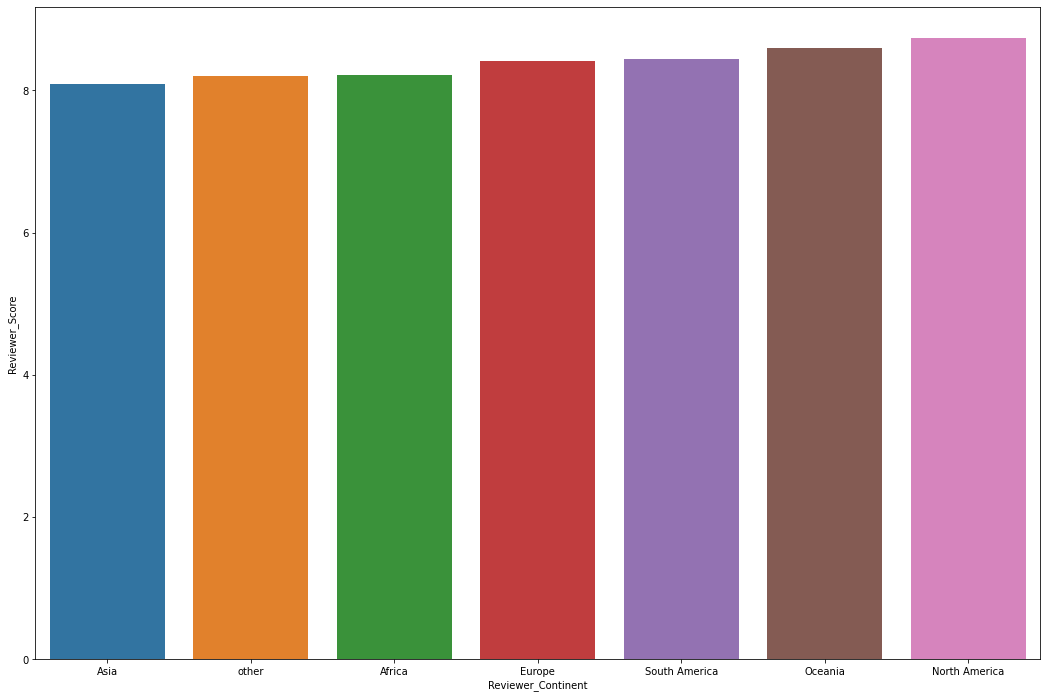

In [66]:
review_score_by_nationality = df.groupby("Reviewer_Continent")["Reviewer_Score"].mean().reset_index().sort_values(by='Reviewer_Score',ascending=True).reset_index(drop=True)
plt.figure(figsize=(18,12))
sns.barplot(x="Reviewer_Continent", y="Reviewer_Score", data=review_score_by_nationality)
plt.show()

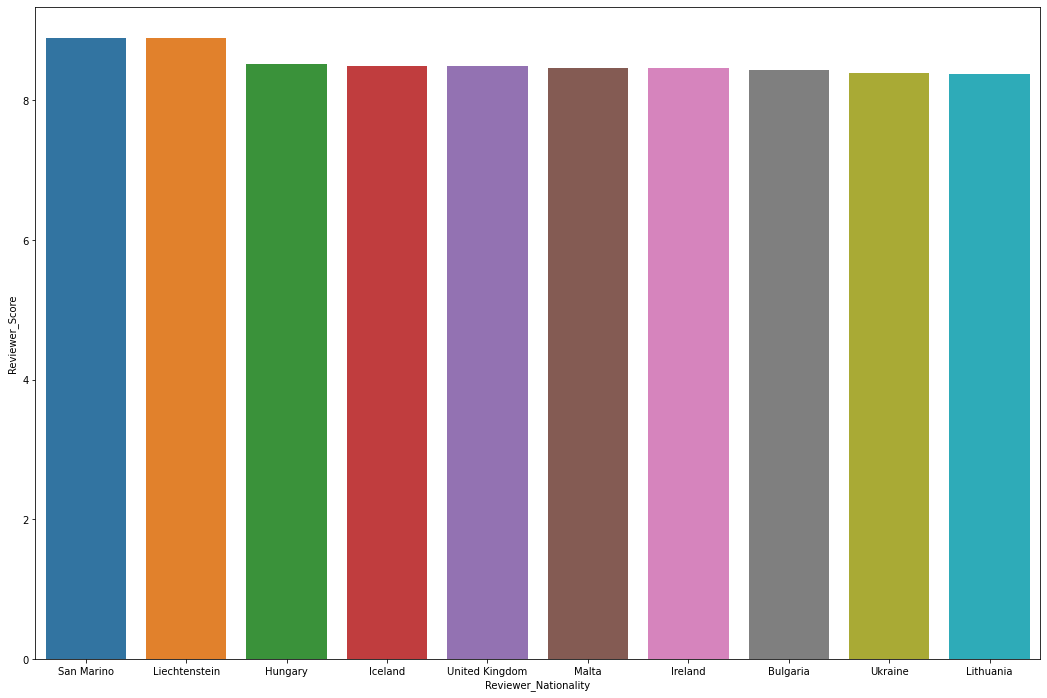

In [67]:
# Top 10 european countries with most generous ratings
europe_df = df[df.Reviewer_Continent == "Europe"]
european_countires_review = europe_df.groupby("Reviewer_Nationality")["Reviewer_Score"].mean().reset_index().sort_values(by='Reviewer_Score',ascending=False).reset_index(drop=True)[:10]
plt.figure(figsize=(18,12))
sns.barplot(x="Reviewer_Nationality", y="Reviewer_Score", data=european_countires_review)
plt.show()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483596 entries, 0 to 515736
Data columns (total 35 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               483596 non-null  object 
 1   Additional_Number_of_Scoring                483596 non-null  int64  
 2   Review_Date                                 483596 non-null  object 
 3   Average_Score                               483596 non-null  float64
 4   Hotel_Name                                  483596 non-null  object 
 5   Reviewer_Nationality                        483596 non-null  object 
 6   Negative_Review                             483596 non-null  object 
 7   Review_Total_Negative_Word_Counts           483596 non-null  int64  
 8   Total_Number_of_Reviews                     483596 non-null  int64  
 9   Positive_Review                             483596 non-null  object 
 

In [69]:
columns_to_be_dropped = ["Hotel_Address", "Review_Date", "Negative_Review", "Positive_Review", "Tags", "Hotel_Name"]
new_df = df.drop(columns=columns_to_be_dropped, axis=0)
new_df.head(5)

,Additional_Number_of_Scoring,Average_Score,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,Sentiment,small_room,expensive,Location_Remote,AC_Problem,Great_Location,Accessbility,Friendly_Staff,Comfortable,Monteray_Value,Good_Breakfast,Reviewer_Continent,Trip_Type,Occupant_Type,Pet,Stayed_Days,Mobile_Submission,Hotel_Country,Review_Year,Review_Month
0,194,7.7,Russia,397,1403,11,7,2.9,0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,leisure,Couple,0,6.0,0,Netherlands,2017,8
1,194,7.7,Ireland,0,1403,105,7,7.5,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe,leisure,Couple,0,4.0,0,Netherlands,2017,8
2,194,7.7,Australia,42,1403,21,9,7.1,3,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Oceania,leisure,Family with kids,0,3.0,1,Netherlands,2017,7
3,194,7.7,United Kingdom,210,1403,26,1,3.8,3,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe,leisure,Single,0,3.0,0,Netherlands,2017,7
4,194,7.7,New Zealand,140,1403,8,3,6.7,10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oceania,leisure,Couple,0,2.0,1,Netherlands,2017,7


In [70]:
# Creating a new field (Single_Occupant, Double_Occupant, Group_Occupant)
new_df["Single_Occupant"]= new_df.Occupant_Type.map(lambda x: 1 if x=="Single" else 0)
new_df["Double_Occupant"] = new_df.Occupant_Type.map(lambda x:1 if x=="Couple" else 0)
new_df["Group_Occupant"] = new_df.Occupant_Type.map(lambda x: 1 if (x=="Adult Group" or x=="Family with kids") else 0)
new_df.head(5)

,Additional_Number_of_Scoring,Average_Score,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,Sentiment,small_room,expensive,Location_Remote,AC_Problem,Great_Location,Accessbility,Friendly_Staff,Comfortable,Monteray_Value,Good_Breakfast,Reviewer_Continent,Trip_Type,Occupant_Type,Pet,Stayed_Days,Mobile_Submission,Hotel_Country,Review_Year,Review_Month,Single_Occupant,Double_Occupant,Group_Occupant
0,194,7.7,Russia,397,1403,11,7,2.9,0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,leisure,Couple,0,6.0,0,Netherlands,2017,8,0,1,0
1,194,7.7,Ireland,0,1403,105,7,7.5,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe,leisure,Couple,0,4.0,0,Netherlands,2017,8,0,1,0
2,194,7.7,Australia,42,1403,21,9,7.1,3,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Oceania,leisure,Family with kids,0,3.0,1,Netherlands,2017,7,0,0,1
3,194,7.7,United Kingdom,210,1403,26,1,3.8,3,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe,leisure,Single,0,3.0,0,Netherlands,2017,7,1,0,0
4,194,7.7,New Zealand,140,1403,8,3,6.7,10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oceania,leisure,Couple,0,2.0,1,Netherlands,2017,7,0,1,0


In [71]:
# Converting the Trip type into numerical features
print(new_df.Trip_Type.unique())
new_df["Business_trip"] =new_df.Trip_Type.map(lambda x: 1 if x=="business" else 0)
new_df["Leisure_trip"] = new_df.Trip_Type.map(lambda x: 1 if x=="leisure" else 0)
new_df["Others_trip"] = new_df.Trip_Type.map(lambda x: 1 if x == 'others' else 0)
new_df.head(10)

['leisure' 'business' 'others']


,Additional_Number_of_Scoring,Average_Score,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,Sentiment,small_room,expensive,Location_Remote,AC_Problem,Great_Location,Accessbility,Friendly_Staff,Comfortable,Monteray_Value,Good_Breakfast,Reviewer_Continent,Trip_Type,Occupant_Type,Pet,Stayed_Days,Mobile_Submission,Hotel_Country,Review_Year,Review_Month,Single_Occupant,Double_Occupant,Group_Occupant,Business_trip,Leisure_trip,Others_trip
0,194,7.7,Russia,397,1403,11,7,2.9,0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,leisure,Couple,0,6.0,0,Netherlands,2017,8,0,1,0,0,1,0
1,194,7.7,Ireland,0,1403,105,7,7.5,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe,leisure,Couple,0,4.0,0,Netherlands,2017,8,0,1,0,0,1,0
2,194,7.7,Australia,42,1403,21,9,7.1,3,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Oceania,leisure,Family with kids,0,3.0,1,Netherlands,2017,7,0,0,1,0,1,0
3,194,7.7,United Kingdom,210,1403,26,1,3.8,3,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe,leisure,Single,0,3.0,0,Netherlands,2017,7,1,0,0,0,1,0
4,194,7.7,New Zealand,140,1403,8,3,6.7,10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oceania,leisure,Couple,0,2.0,1,Netherlands,2017,7,0,1,0,0,1,0
5,194,7.7,Poland,17,1403,20,1,6.7,10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,leisure,Adult Group,0,1.0,0,Netherlands,2017,7,0,0,1,0,1,0
6,194,7.7,United Kingdom,33,1403,18,6,4.6,17,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,leisure,Adult Group,0,5.0,1,Netherlands,2017,7,0,0,1,0,1,0
7,194,7.7,United Kingdom,11,1403,19,1,10.0,17,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Europe,leisure,Couple,0,2.0,1,Netherlands,2017,7,0,1,0,0,1,0
8,194,7.7,Belgium,34,1403,0,3,6.5,25,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,leisure,Couple,0,1.0,1,Netherlands,2017,7,0,1,0,0,1,0
9,194,7.7,Norway,15,1403,50,1,7.9,26,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Europe,leisure,Couple,0,7.0,0,Netherlands,2017,7,0,1,0,0,1,0


In [76]:
print(new_df.Business_trip.unique(), new_df.Leisure_trip.unique(), new_df.Others_trip.unique())

[0 1] [1 0] [0 1]


In [79]:
new_df.Reviewer_Continent.unique()
continent_mapper = {
    "Africa": 1,
    "Asia": 2,
    "Europe": 3,
    "North America": 4,
    "Oceania": 5,
    "South America": 6,
    "other": 7
}
new_df.Reviewer_Continent= new_df.Reviewer_Continent.map(continent_mapper)
new_df.head(5)

,Additional_Number_of_Scoring,Average_Score,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,Sentiment,small_room,expensive,Location_Remote,AC_Problem,Great_Location,Accessbility,Friendly_Staff,Comfortable,Monteray_Value,Good_Breakfast,Reviewer_Continent,Trip_Type,Occupant_Type,Pet,Stayed_Days,Mobile_Submission,Hotel_Country,Review_Year,Review_Month,Single_Occupant,Double_Occupant,Group_Occupant,Business_trip,Leisure_trip,Others_trip
0,194,7.7,Russia,397,1403,11,7,2.9,0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,leisure,Couple,0,6.0,0,Netherlands,2017,8,0,1,0,0,1,0
1,194,7.7,Ireland,0,1403,105,7,7.5,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,leisure,Couple,0,4.0,0,Netherlands,2017,8,0,1,0,0,1,0
2,194,7.7,Australia,42,1403,21,9,7.1,3,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5,leisure,Family with kids,0,3.0,1,Netherlands,2017,7,0,0,1,0,1,0
3,194,7.7,United Kingdom,210,1403,26,1,3.8,3,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,leisure,Single,0,3.0,0,Netherlands,2017,7,1,0,0,0,1,0
4,194,7.7,New Zealand,140,1403,8,3,6.7,10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,leisure,Couple,0,2.0,1,Netherlands,2017,7,0,1,0,0,1,0


In [83]:
from sklearn.preprocessing import LabelEncoder

le_rn = LabelEncoder()
new_df["Reviewer_Nationality"] = le_rn.fit_transform(new_df["Reviewer_Nationality"])

,Additional_Number_of_Scoring,Average_Score,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,Sentiment,small_room,expensive,Location_Remote,AC_Problem,Great_Location,Accessbility,Friendly_Staff,Comfortable,Monteray_Value,Good_Breakfast,Reviewer_Continent,Trip_Type,Occupant_Type,Pet,Stayed_Days,Mobile_Submission,Hotel_Country,Review_Year,Review_Month,Single_Occupant,Double_Occupant,Group_Occupant,Business_trip,Leisure_trip,Others_trip
0,194,7.7,167,397,1403,11,7,2.9,0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,leisure,Couple,0,6.0,0,Netherlands,2017,8,0,1,0,0,1,0
1,194,7.7,98,0,1403,105,7,7.5,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,leisure,Couple,0,4.0,0,Netherlands,2017,8,0,1,0,0,1,0
2,194,7.7,14,42,1403,21,9,7.1,3,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5,leisure,Family with kids,0,3.0,1,Netherlands,2017,7,0,0,1,0,1,0
3,194,7.7,214,210,1403,26,1,3.8,3,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,leisure,Single,0,3.0,0,Netherlands,2017,7,1,0,0,0,1,0
4,194,7.7,146,140,1403,8,3,6.7,10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,leisure,Couple,0,2.0,1,Netherlands,2017,7,0,1,0,0,1,0


In [84]:
le_hn = LabelEncoder()
new_df["Hotel_Country"] = le_hn.fit_transform(new_df.Hotel_Country)
new_df.head(5)

,Additional_Number_of_Scoring,Average_Score,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,Sentiment,small_room,expensive,Location_Remote,AC_Problem,Great_Location,Accessbility,Friendly_Staff,Comfortable,Monteray_Value,Good_Breakfast,Reviewer_Continent,Trip_Type,Occupant_Type,Pet,Stayed_Days,Mobile_Submission,Hotel_Country,Review_Year,Review_Month,Single_Occupant,Double_Occupant,Group_Occupant,Business_trip,Leisure_trip,Others_trip
0,194,7.7,167,397,1403,11,7,2.9,0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,leisure,Couple,0,6.0,0,3,2017,8,0,1,0,0,1,0
1,194,7.7,98,0,1403,105,7,7.5,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,leisure,Couple,0,4.0,0,3,2017,8,0,1,0,0,1,0
2,194,7.7,14,42,1403,21,9,7.1,3,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5,leisure,Family with kids,0,3.0,1,3,2017,7,0,0,1,0,1,0
3,194,7.7,214,210,1403,26,1,3.8,3,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,leisure,Single,0,3.0,0,3,2017,7,1,0,0,0,1,0
4,194,7.7,146,140,1403,8,3,6.7,10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,leisure,Couple,0,2.0,1,3,2017,7,0,1,0,0,1,0


In [85]:
new_df.drop(columns=["Trip_Type", "Occupant_Type"], axis=0, inplace=True)
new_df.head(5)

,Additional_Number_of_Scoring,Average_Score,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,Sentiment,small_room,expensive,Location_Remote,AC_Problem,Great_Location,Accessbility,Friendly_Staff,Comfortable,Monteray_Value,Good_Breakfast,Reviewer_Continent,Pet,Stayed_Days,Mobile_Submission,Hotel_Country,Review_Year,Review_Month,Single_Occupant,Double_Occupant,Group_Occupant,Business_trip,Leisure_trip,Others_trip
0,194,7.7,167,397,1403,11,7,2.9,0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,6.0,0,3,2017,8,0,1,0,0,1,0
1,194,7.7,98,0,1403,105,7,7.5,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,0,4.0,0,3,2017,8,0,1,0,0,1,0
2,194,7.7,14,42,1403,21,9,7.1,3,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5,0,3.0,1,3,2017,7,0,0,1,0,1,0
3,194,7.7,214,210,1403,26,1,3.8,3,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,0,3.0,0,3,2017,7,1,0,0,0,1,0
4,194,7.7,146,140,1403,8,3,6.7,10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0,2.0,1,3,2017,7,0,1,0,0,1,0


In [117]:
# converting the datatype of some columns from float into integer 
final_df = new_df.astype({"small_room": "int64", "expensive": "int64", 
                        "Location_Remote": "int64", "AC_Problem":"int64",
                        "Great_Location":"int64", "Accessbility": "int64", 
                        "Friendly_Staff":"int64", "Comfortable":"int64", 
                        "Monteray_Value":"int64", "Good_Breakfast":"int64", 
                        "Reviewer_Continent":"int64", "Stayed_Days": "int64"})
final_df.head(5)

,Additional_Number_of_Scoring,Average_Score,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,Sentiment,small_room,expensive,Location_Remote,AC_Problem,Great_Location,Accessbility,Friendly_Staff,Comfortable,Monteray_Value,Good_Breakfast,Reviewer_Continent,Pet,Stayed_Days,Mobile_Submission,Hotel_Country,Review_Year,Review_Month,Single_Occupant,Double_Occupant,Group_Occupant,Business_trip,Leisure_trip,Others_trip
0,194,7.7,167,397,1403,11,7,2.9,0,-1,0,0,0,0,0,0,0,0,0,0,3,0,6,0,3,2017,8,0,1,0,0,1,0
1,194,7.7,98,0,1403,105,7,7.5,0,1,0,0,0,0,1,0,0,0,0,0,3,0,4,0,3,2017,8,0,1,0,0,1,0
2,194,7.7,14,42,1403,21,9,7.1,3,1,0,0,0,0,1,0,1,0,0,0,5,0,3,1,3,2017,7,0,0,1,0,1,0
3,194,7.7,214,210,1403,26,1,3.8,3,1,0,0,0,0,1,0,0,0,0,0,3,0,3,0,3,2017,7,1,0,0,0,1,0
4,194,7.7,146,140,1403,8,3,6.7,10,1,0,0,0,0,0,0,0,0,0,0,5,0,2,1,3,2017,7,0,1,0,0,1,0


In [118]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483596 entries, 0 to 515736
Data columns (total 33 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                483596 non-null  int64  
 1   Average_Score                               483596 non-null  float64
 2   Reviewer_Nationality                        483596 non-null  int64  
 3   Review_Total_Negative_Word_Counts           483596 non-null  int64  
 4   Total_Number_of_Reviews                     483596 non-null  int64  
 5   Review_Total_Positive_Word_Counts           483596 non-null  int64  
 6   Total_Number_of_Reviews_Reviewer_Has_Given  483596 non-null  int64  
 7   Reviewer_Score                              483596 non-null  float64
 8   days_since_review                           483596 non-null  int64  
 9   Sentiment                                   483596 non-null  int64  
 

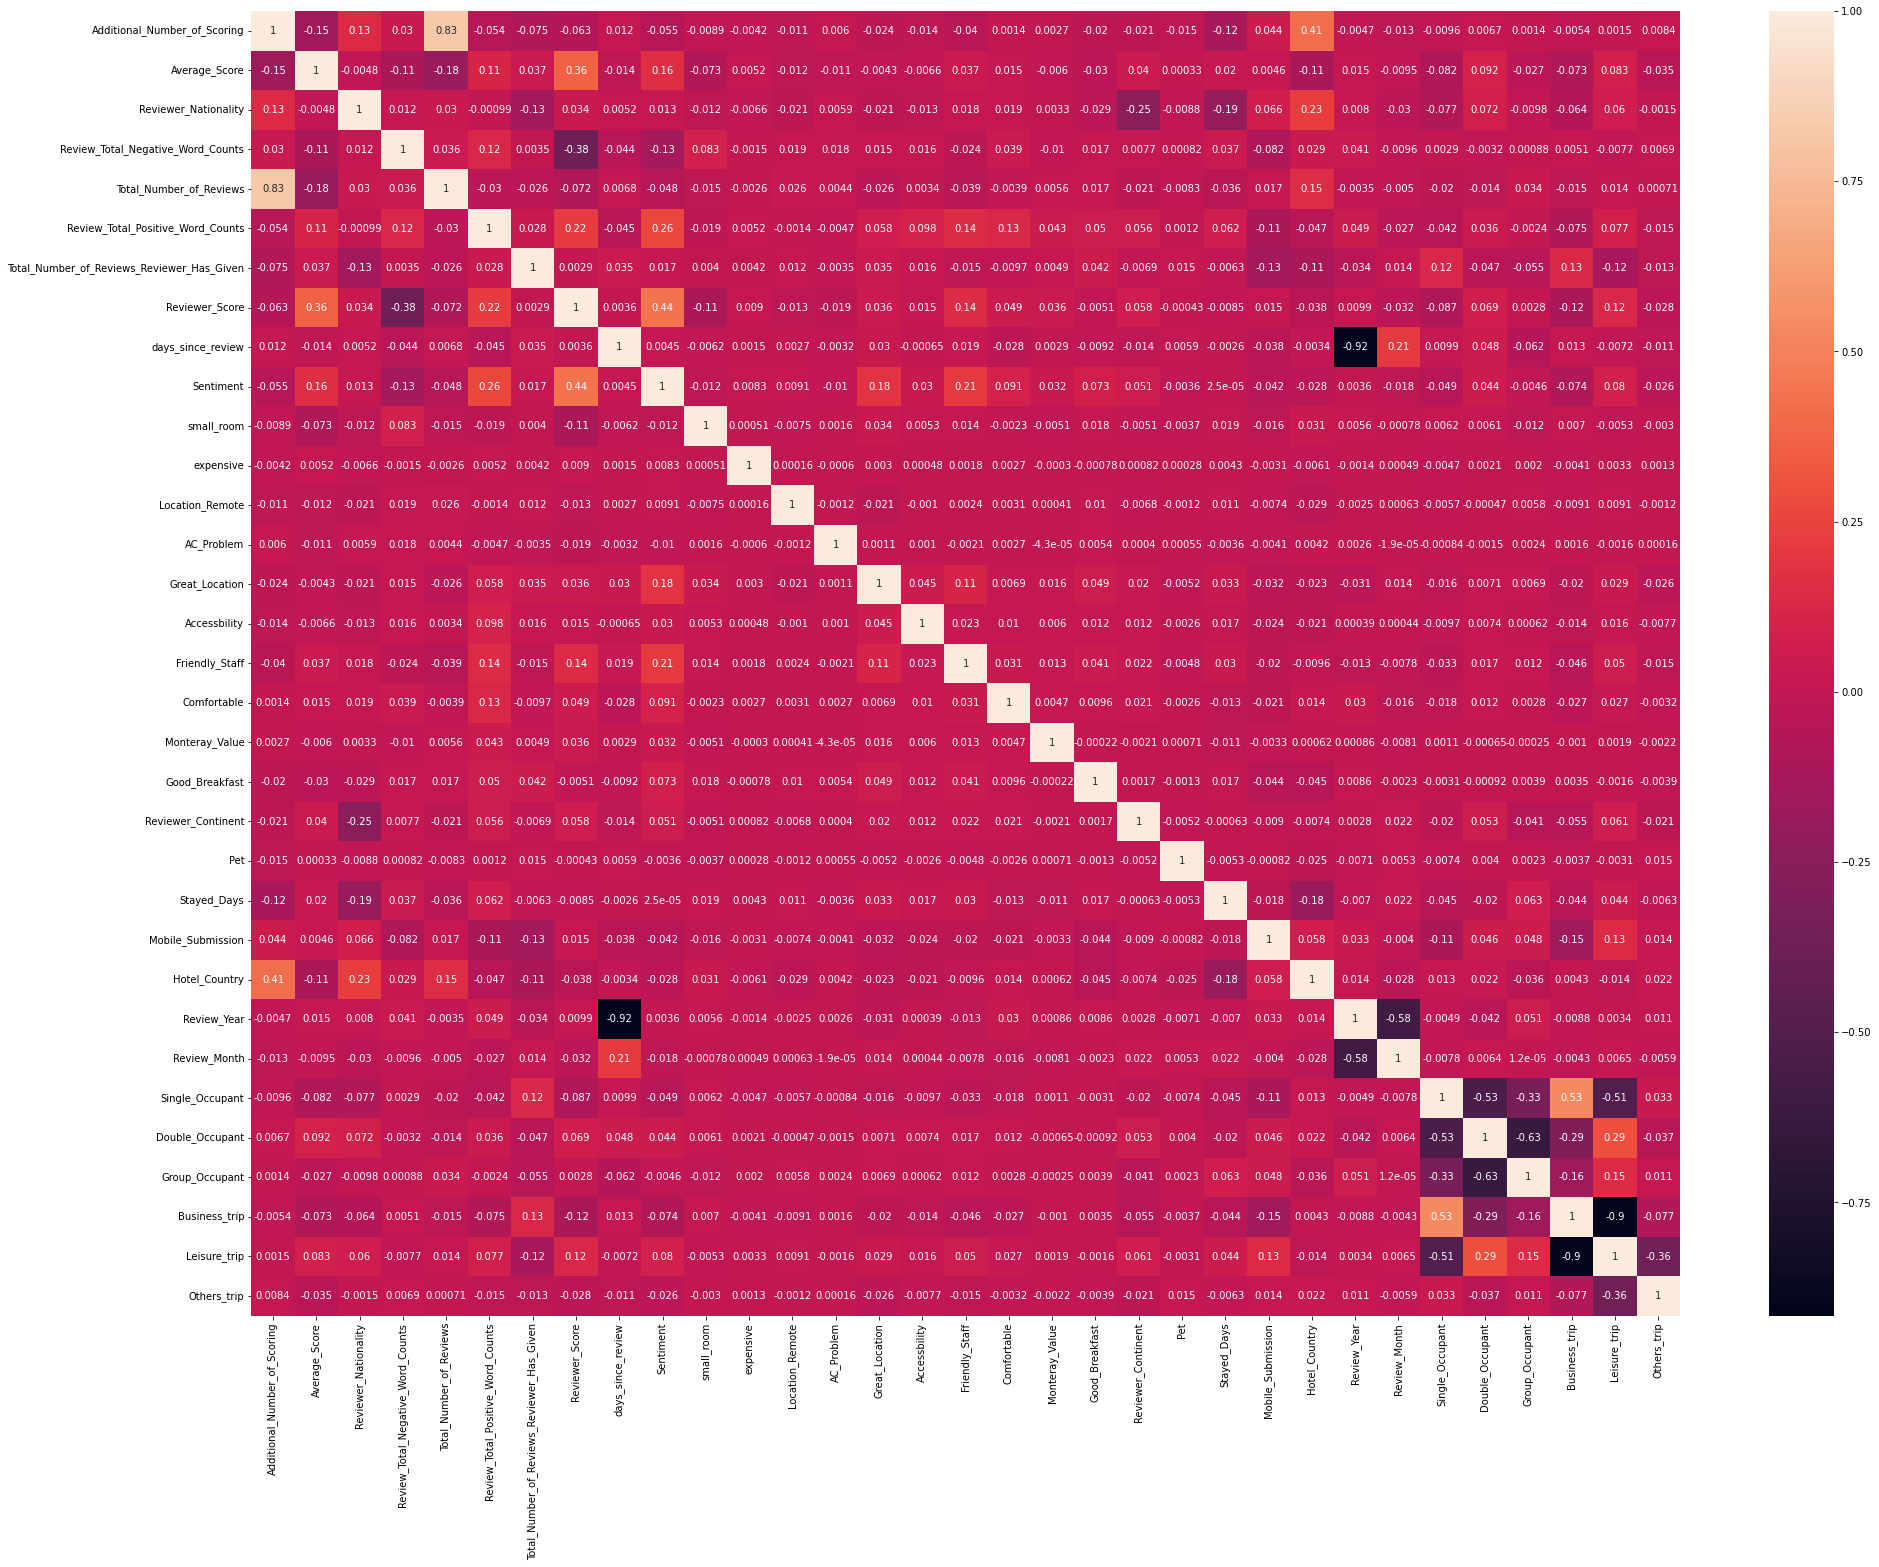

In [119]:
corr = final_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(32, 24))
sns.heatmap(data=corr, annot=True)
plt.show()

In [120]:
highly_correlated_feature_set = []
for col in corr.columns:
    for index in corr.index:
        if col!=index:
            corr_value = corr.loc[index, col]
            if np.abs(corr_value)>0.8:
                highly_correlated_feature_set.append((index, col))

In [121]:
highly_correlated_feature_set

[('Total_Number_of_Reviews', 'Additional_Number_of_Scoring'),
 ('Additional_Number_of_Scoring', 'Total_Number_of_Reviews'),
 ('Review_Year', 'days_since_review'),
 ('days_since_review', 'Review_Year'),
 ('Leisure_trip', 'Business_trip'),
 ('Business_trip', 'Leisure_trip')]

In [122]:
final_df.drop(columns=["Additional_Number_of_Scoring", "Review_Year", "Leisure_trip"])
final_df.head(5)

,Additional_Number_of_Scoring,Average_Score,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,Sentiment,small_room,expensive,Location_Remote,AC_Problem,Great_Location,Accessbility,Friendly_Staff,Comfortable,Monteray_Value,Good_Breakfast,Reviewer_Continent,Pet,Stayed_Days,Mobile_Submission,Hotel_Country,Review_Year,Review_Month,Single_Occupant,Double_Occupant,Group_Occupant,Business_trip,Leisure_trip,Others_trip
0,194,7.7,167,397,1403,11,7,2.9,0,-1,0,0,0,0,0,0,0,0,0,0,3,0,6,0,3,2017,8,0,1,0,0,1,0
1,194,7.7,98,0,1403,105,7,7.5,0,1,0,0,0,0,1,0,0,0,0,0,3,0,4,0,3,2017,8,0,1,0,0,1,0
2,194,7.7,14,42,1403,21,9,7.1,3,1,0,0,0,0,1,0,1,0,0,0,5,0,3,1,3,2017,7,0,0,1,0,1,0
3,194,7.7,214,210,1403,26,1,3.8,3,1,0,0,0,0,1,0,0,0,0,0,3,0,3,0,3,2017,7,1,0,0,0,1,0
4,194,7.7,146,140,1403,8,3,6.7,10,1,0,0,0,0,0,0,0,0,0,0,5,0,2,1,3,2017,7,0,1,0,0,1,0


In [123]:
# Separating the dataframe into X (Independent features) and y(dependent features
y = final_df["Reviewer_Score"].values
X = final_df.drop(columns=["Reviewer_Score"], axis=0)
X.head(5)

,Additional_Number_of_Scoring,Average_Score,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,Sentiment,small_room,expensive,Location_Remote,AC_Problem,Great_Location,Accessbility,Friendly_Staff,Comfortable,Monteray_Value,Good_Breakfast,Reviewer_Continent,Pet,Stayed_Days,Mobile_Submission,Hotel_Country,Review_Year,Review_Month,Single_Occupant,Double_Occupant,Group_Occupant,Business_trip,Leisure_trip,Others_trip
0,194,7.7,167,397,1403,11,7,0,-1,0,0,0,0,0,0,0,0,0,0,3,0,6,0,3,2017,8,0,1,0,0,1,0
1,194,7.7,98,0,1403,105,7,0,1,0,0,0,0,1,0,0,0,0,0,3,0,4,0,3,2017,8,0,1,0,0,1,0
2,194,7.7,14,42,1403,21,9,3,1,0,0,0,0,1,0,1,0,0,0,5,0,3,1,3,2017,7,0,0,1,0,1,0
3,194,7.7,214,210,1403,26,1,3,1,0,0,0,0,1,0,0,0,0,0,3,0,3,0,3,2017,7,1,0,0,0,1,0
4,194,7.7,146,140,1403,8,3,10,1,0,0,0,0,0,0,0,0,0,0,5,0,2,1,3,2017,7,0,1,0,0,1,0


In [124]:
y

array([ 2.9,  7.5,  7.1, ..., 10. ,  5.8,  8.8])

In [125]:
X.shape, y.shape

((483596, 32), (483596,))

In [126]:
# Train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=50)
X_train.shape, y_train.shape

((362697, 32), (362697,))

In [127]:
# applying Standard Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [137]:
# applying the XGBoost 
import xgboost as xgb

xg_train = xgb.DMatrix(X_train, label=y_train)
xg_test = xgb.DMatrix(X_test, label=y_test)

param = {}
# used gamma regression 
# eta is here learning rate
# max_depth is maximun depth of regression tree
param['objective'] = 'reg:gamma'
param['eta'] = 0.2
param['max_depth'] = 4
param['silent'] = 1
param['nthread'] = 4
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 50

bst = xgb.train(param, xg_train, num_round, watchlist)
y_test_pred = bst.predict(xg_test)

[13:21:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-gamma-nloglik:13.42106	test-gamma-nloglik:13.42107
[1]	train-gamma-nloglik:11.24701	test-gamma-nloglik:11.24702
[2]	train-gamma-nloglik:9.49794	test-gamma-nloglik:9.49794
[3]	train-gamma-nloglik:8.09577	test-gamma-nloglik:8.09577
[4]	train-gamma-nloglik:6.97642	test-gamma-nloglik:6.97638
[5]	train-gamma-nloglik:6.08727	test-gamma-nloglik:6.08722
[6]	train-gamma-nloglik:5.38502	test-gamma-nloglik:5.38495
[7]	train-gamma-nloglik:4.83409	test-gamma-nloglik:4.83402
[8]	train-gamma-nloglik:4.40511	test-gamma-nloglik:4.40502
[9]	train-gamma-nlo

In [141]:
# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
r2 = r2_score(y_test,y_test_pred)

print("Mean absolute Error of Test data set is : ", mae)
print("Mean square Error of Test data set is : ", mse)
print(" R Squared Score of Test data set is : ", r2)

Mean absolute Error of Test data set is :  0.8826623204669473
Mean square Error of Test data set is :  1.3825102694244247
 R Squared Score of Test data set is :  0.4812737447079094


In [140]:
#Calculate Error Rate
error = y_test_pred - y_test
error = abs(error)
error_rate = np.sum(error)/np.sum(y_test)
print("error rate = %f " %error_rate )

error rate = 0.105026 


In [145]:
# adjusted R2 score 
n=len(final_df) # number of observations
k=final_df.shape[1] # number of indeoendent variables
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.481238344973388


It seems that our model has been able to capture only 48 percent of variance in model se we need to do check further. Our target will be capture at least 80 percent of variance from the dataset.|

#### To be continued.